In [ ]:
#importing library to print multiple lines in one code shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# **Without Using Any Library**

# **Using SKLearn Library**

# **Using PyTorch Library**

[Github Repo](https://github.com/pytorch) |
[Official PyTorch Documentation](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) | [PyTorch](https://pytorch.org/) | [Discussion Forum](https://discuss.pytorch.org/)


In [ ]:
import torch

## **Tensors**

Tensors here refer to the math tensor (scalar -> vector -> matrix -> Tensor).A combination of scalar put togethere forms a vector, a combination of vectors put togethere forms a matric and hence a combination of matrix put togethere forms a tensor. Tensors are similar to 3D arrays.

![scalar vector matrix tensor and what they look like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)

In [ ]:
print(3) # a rank 0 tensor -- scalar; this is a scalar with shape []
print([1. ,2., 3.]) # a rank 1 tensor -- 1d array; this is a vector with shape [3]
print([[1., 2., 3.], [4., 5., 6.]]) # a rank 2 tensor -- 2d array; a matrix with shape [2, 3]
print([[[1., 2., 3.]], [[7., 8., 9.]]]) # a rank 3 tensor -- 3d array with shape [2, 1, 3]

3
[1.0, 2.0, 3.0]
[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]


### **Tensor Initialization**
There are several ways to instantiate tensors in `PyTorch`, which we will go through next.

#### **From a Python List**

We can initalize a tensor from a `Python` list, which could include sublists. The dimensions and the data types will be automatically inferred by `PyTorch` when we use [`torch.tensor()`](https://pytorch.org/docs/stable/generated/torch.tensor.html).


In [ ]:
# Initialize a tensor from a Python List
data = [
        [0, 1],
        [2, 3],
        [4, 5]
       ]
x_python = torch.tensor(data)

# Print the tensor
x_python

NameError: ignored

We can also call `torch.tensor()` with the optional `dtype` parameter, which will set the data type. Some useful datatypes to be familiar with are: `torch.bool`, `torch.float`, and `torch.long`.

In [ ]:
# We are using the dtype to create a tensor of particular type
x_float = torch.tensor(data, dtype=torch.float)
x_float

NameError: ignored

In [ ]:
# We are using the dtype to create a tensor of particular type
x_bool = torch.tensor(data, dtype=torch.bool)
x_bool

We can also get the same tensor in our specified data type using methods such as `float()`, `long()` etc.

In [ ]:
x_python.float()#astype

We can also use `tensor.FloatTensor`, `tensor.LongTensor`, `tensor.Tensor` classes to instantiate a tensor of particular type. `LongTensor`s are particularly important in NLP as many methods that deal with indices require the indices to be passed as a `LongTensor`, which is a 64 bit integer.

In [ ]:
# `torch.Tensor` defaults to float
# Same as torch.FloatTensor(data)
x = torch.Tensor(data)
x

#### **From a NumPy Array**
We can also initialize a tensor from a `NumPy` array.

In [ ]:
type([[1,2],[2,3]])

In [ ]:
import numpy as np

# Initialize a tensor from a NumPy array
ndarray = np.array(data) # converting list to array
x_numpy = torch.from_numpy(ndarray) # converting array to tensor

# Print the tensor
x_numpy

#### **From a Tensor**
We can also initialize a tensor from another tensor, using the following methods:

* `torch.ones_like(old_tensor)`: Initializes a tensor of `1s`.
* `torch.zeros_like(old_tensor)`: Initializes a tensor of `0s`.
* `torch.rand_like(old_tensor)`: Initializes a tensor where all the elements are sampled from a uniform distribution between `0` and `1`.
* `torch.randn_like(old_tensor)`: Initializes a tensor where all the elements are sampled from a normal distribution.

All of these methods preserve the tensor properties of the original tensor passed in, such as the `shape` and `device`, which we will cover in a bit.

In [ ]:
# creating a base tensor using 'python list'
x = torch.tensor([[1., 2], [3, 4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
# Initialize a tensor of 0s
x_zeros = torch.zeros_like(x)
x_zeros

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
# Initialize a tensor of 1s
x_ones = torch.ones_like(x)
x_ones

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
# Initialize a tensor where each element is sampled from a uniform distribution
# between 0 and 1
x_rand = torch.rand_like(x)
x_rand

tensor([[0.4899, 0.1224],
        [0.8056, 0.7657]])

In [ ]:
# Initialize a tensor where each element is sampled from a normal distribution
x_randn = torch.randn_like(x)
x_randn

tensor([[ 1.2210, -0.2371],
        [-2.3569,  0.9598]])

#### **By Specifying a Shape**
We can also instantiate tensors by specifying their shapes (which we will cover in more detail in a bit). The methods we could use follow the ones in the previous section:
* `torch.zeros()`
* `torch.ones()`
* `torch.rand()`
* `torch.randn()`

In [ ]:
# Initialize a 2x3x2 tensor of 0s -- 2 matries having 3 rows and 2 columns
shape = (2, 3, 2)
x_zeros = torch.zeros(shape) # x_zeros = torch.zeros(2, 3, 2) is an alternative
x_zeros

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])

#### **With `torch.arange()`**
We can also create a tensor with `torch.arange(end)`, which returns a `1-D` tensor with elements ranging from `0` to `end-1`. We can use the optional `start` and `step` parameters to create tensors with different ranges.  

In [ ]:
# Create a tensor with values 0-9
x = torch.arange(10)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### **Tensor Properties**

Tensors have a few properties that are important for us to cover. These are namely `datatype`, `shape` and the `device` properties.

#### **Data Type**

The `dtype` property lets us see the data type of a tensor.

In [ ]:
# Initialize a single 3x2 tensor, with 3 rows and 2 columns
x = torch.ones(3, 2)
x.dtype

torch.float32

#### **Shape**

The `shape` property tells us the shape of our tensor. This can help us identify how many dimensional our tensor is as well as how many elements exist in each dimension.

In [ ]:
# Initialize a single tensor with 3 rows and 2 columns
x = torch.Tensor([[1, 2], [3, 4], [5, 6]])
x

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [ ]:
# Print out its shape
x.shape # Alternative to this is x.size()

torch.Size([3, 2])

In [ ]:
# Print out the number of elements in a particular dimension
# 0th dimension corresponds to the rows
x.shape[0]

3

We can also get the size of a particular dimension with the `size()` method.


In [ ]:
# Get the size of the 0th dimension
x.size(0)

3

We can change the shape of a tensor with the `view()` method.

In [ ]:
# Example use of view()
# x_view shares the same memory as x, so changing one changes the other
x_view = x.view(2,3)
x_view

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
# We can ask PyTorch to automatically infer the size of a dimension with -1
x_view = x.view(3, -1)
x_view

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

We can also use `torch.reshape()` method for a similar purpose. There is a subtle difference between `reshape()` and `view()`: `view()` requires the data to be stored contiguously in the memory. You can refer to [this](https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch) StackOverflow answer for more information. In simple terms, contiguous means that the way our data is laid out in the memory is the same as the way we would read elements from it. This happens because some methods, such as `transpose()` and `view()`, do not actually change how our data is stored in the memory. They just change the meta information about out tensor, so that when we use it we will see the elements in the order we expect.

`reshape()` calls `view()` internally if the data is stored contiguously, if not, it returns a copy. The difference here isn't too important for basic tensors, but if you perform operations that make the underlying storage of the data non-contiguous (such as taking a transpose), you will have issues using `view()`. If you would like to match the way your tensor is stored in the memory to how it is used, you can use the `contiguous()` method.  

In [ ]:
# Change the shape of x to be 3x2
# x_reshaped could be a reference to or copy of x
x_reshaped = torch.reshape(x, (2, 3))
x_reshaped

tensor([[1., 2., 3.],
        [4., 5., 6.]])

We can use `torch.unsqueeze(x, dim)` function to add a dimension of size `1` to the provided `dim`, where `x` is the tensor. We can also use the corresponding use `torch.squeeze(x)`, which removes the dimensions of size `1`.


In [ ]:
# Initialize a 1x5x2 tensor, with 5 rows and 2 columns
x = torch.arange(10).reshape(5, 2)
x

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
# Add a new dimension of size 1 at the 1st dimension
x = x.unsqueeze(1)
x
x.shape

torch.Size([5, 1, 2])

In [ ]:
# Squeeze the dimensions of x by getting rid of all the dimensions with 1 element
x = x.squeeze()
x.shape

torch.Size([5, 2])

If we want to get the total number of elements in a tensor, we can use the `numel()` method.

In [ ]:
x

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
# Get the number of elements in tensor.
x.numel()

10

#### **Device**
Device property tells `PyTorch` where to store our tensor. Where a tensor is stored determines which device, `GPU` (also called CUDA) or `CPU`, would be handling the computations involving it. We can find the device of a tensor with the `device` property.

In [ ]:
# Initialize an example tensor
x = torch.Tensor([[1, 2], [3, 4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
# Get the device of the tensor
x.device

device(type='cpu')

We can move a tensor from one device to another with the method `to(device)`.

In [ ]:
torch.cuda.is_available() #Bool

False

In [ ]:
# Check if a GPU is available, if so, move the tensor to the GPU
if torch.cuda.is_available():
  x.to('cuda')

### **Tensor Indexing**
In `PyTorch` we can index tensors, similar to `NumPy`.

In [ ]:
x = [1,2,3,4,5] #x[-1] #x[1:] #x[1:3] - indexing in numpy example

In [ ]:
# Initialize an example tensor
x = torch.Tensor([
                  [[1, 2], [3, 4]],
                  [[5, 6], [7, 8]],
                  [[9, 10], [11, 12]]
                 ])
x

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])

In [ ]:
x.shape

torch.Size([3, 2, 2])

In [ ]:
# Access the 0th element, which is the first row
x[0] # Equivalent to x[0, :]

tensor([[1., 2.],
        [3., 4.]])

We can also index into multiple dimensions with `:`.

In [ ]:
# Get the top left element of each element in our tensor
x[:, 0, 0]

tensor([1., 5., 9.])

We can also access arbitrary elements in each dimension.

In [ ]:
# Print x again to see our tensor
x

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])

In [ ]:
# Let's access the 0th and 1st elements, each twice
i = torch.tensor([0, 0, 1, 1])
x[i]

tensor([[[1., 2.],
         [3., 4.]],

        [[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[5., 6.],
         [7., 8.]]])

In [ ]:
# Let's access the 0th elements of the 1st and 2nd elements
i = torch.tensor([1, 2])
j = torch.tensor([0])
x[i, j]

tensor([[ 5.,  6.],
        [ 9., 10.]])

We can get a `Python` scalar value from a tensor with `item()`.

In [ ]:
x[0, 0, 0]

tensor(1.)

In [ ]:
x[0, 0, 0].item()

1.0

### **Tensor Operations**
PyTorch operations are very similar to those of `NumPy`. We can work with both scalars and other tensors.


In [ ]:
# Create an example tensor
x = torch.ones((3,2,2))
x

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

In [ ]:
# Perform elementwise addition
# Use - for subtraction
x + 2

tensor([[[3., 3.],
         [3., 3.]],

        [[3., 3.],
         [3., 3.]],

        [[3., 3.],
         [3., 3.]]])

In [ ]:
# Perform elementwise multiplication
# Use / for division
x * 2

tensor([[[2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.]]])

We can apply the same operations between different tensors of compatible sizes.


In [ ]:
# Create a 4x3 tensor of 6s
a = torch.ones((4,3)) * 6
a

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

In [ ]:
# Create a 1D tensor of 2s
b = torch.ones(3) * 2
b

tensor([2., 2., 2.])

In [ ]:
# Divide a by b
a / b

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

We can use `tensor.matmul(other_tensor)` for matrix multiplication and `tensor.T` for transpose. Matrix multiplication can also be performed with `@`.

In [ ]:
# Alternative to a.matmul(b)
# a @ b.T returns the same result since b is 1D tensor and the 2nd dimension
# is inferred
a @ b #a.b.T

tensor([36., 36., 36., 36.])

In [ ]:
# Import pprint, module we use for making our print statements prettier
import pprint
pp = pprint.PrettyPrinter()

pp.pprint(a.shape)
pp.pprint(a.T.shape)

torch.Size([4, 3])
torch.Size([3, 4])


We can take the mean and standard deviation along a certain dimension with the methods `mean(dim)` and `std(dim)`. That is, if we want to get the mean `3x2` matrix in a `4x3x2` matrix, we would set the `dim` to be 0. We can call these methods with no parameter to get the mean and standard deviation for the whole tensor. To use `mean` and `std` our tensor should be a floating point type.

In [ ]:
# Create an example tensor
m = torch.tensor(
    [
     [1., 1.],
     [2., 2.],
     [3., 3.],
     [4., 4.]
    ]
)

pp.pprint("Mean: {}".format(m.mean()))
pp.pprint("Mean in the 0th dimension: {}".format(m.mean(0)))
pp.pprint("Mean in the 1st dimension: {}".format(m.mean(1)))

'Mean: 2.5'
'Mean in the 0th dimension: tensor([2.5000, 2.5000])'
'Mean in the 1st dimension: tensor([1., 2., 3., 4.])'


We can concatenate tensors using `torch.cat`.



In [ ]:
# Concatenate in dimension 0 and 1
a_cat0 = torch.cat([a, a, a], dim=0)
a_cat1 = torch.cat([a, a, a], dim=1)

print("Initial shape: {}".format(a.shape))
print("Shape after concatenation in dimension 0: {}".format(a_cat0.shape))
print("Shape after concatenation in dimension 1: {}".format(a_cat1.shape))

Initial shape: torch.Size([4, 3])
Shape after concatenation in dimension 0: torch.Size([12, 3])
Shape after concatenation in dimension 1: torch.Size([4, 9])


Most of the operations in `PyTorch` are not in place. However, `PyTorch` offers the in place versions of operations available by adding an underscore (`_`) at the end of the method name.

In [ ]:
# Print our tensor
a

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

In [ ]:
# add() is not in place
a.add(a)
a

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]])

In [ ]:
# add_() is in place
a.add_(a)
a

tensor([[12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.],
        [12., 12., 12.]])

## **Autograd** - Automatic Differentiation(Gradient) Library

Given that we have defined the set of operations that need to be performed, the framework itself can figure out how to compute the derivatives(gradients). We can call the `backward()` method to ask `PyTorch` to calculate the gradiends, which are then stored in the `grad` attribute.

In [ ]:
# Create an example tensor requires_grad parameter tells PyTorch to store gradients
x = torch.tensor([2.], requires_grad=True)
# Print the gradient if it is calculated, Currently None is printed because we have not calculated gradient yet so there is nothing stored
pp.pprint(x.grad)

None


In [ ]:
# Calculating the gradient of y with respect to x
y = x * x * 3 # 3x^2
y.backward() # d(y)/d(x) = d(3x^2)/d(x) = 6x = 12
pp.pprint(x.grad) #now since we have calcuated the gradient it has stored it and hence none will not be printed

tensor([12.])


Let's run backprop from a different tensor again to see what happens.

In [ ]:
z = x * x * 3 # 3x^2
z.backward()
pp.pprint(x.grad) # (12+12 = 24)

tensor([24.])


We can see that the `x.grad` is updated to be the sum of the gradients calculated so far. When we run backprop in a neural network, we sum up all the gradients for a particular neuron before making an update. This is exactly what is happening here! This is also the reason why we need to run `zero_grad()` in every training iteration (more on this later). Otherwise our gradients would keep building up from one training iteration to the other, which would cause our updates to be wrong.

## **Linear Perceptron**

In [ ]:
# importing required libraries
import torch.nn as nn
import pandas as pd
import numpy as np

In [ ]:
#reading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/001 My Skills/002 CS Engineering   Automated Math (BPHC)/004 Data Science (DS)   Artificial Intelligence (AI)/002 Tabular Cross Sectional Data (Structured Data) (Non Sequential Data)/002 Machine Learning (ML)/001 Supervised Learning/001 Regression Problem/001 Single Target Variable (Univariate)/002 Deep Learning/001 Linear Perceptron/insurance.txt')

In [ ]:
# before this step do all the data preprocessing you want to do, i am not doing here just cause i am lazy
# spilling the data into x and y, ideally you should do train test split also but i am not doing the same cause i am lazy
x_train = torch.FloatTensor(dataset.iloc[:,:-1].values)
y_train = torch.FloatTensor(dataset.iloc[:,-1].values)

In [ ]:
x_train

tensor([[19.0000, 27.9000,  0.0000],
        [18.0000, 33.7700,  1.0000],
        [28.0000, 33.0000,  3.0000],
        ...,
        [18.0000, 36.8500,  0.0000],
        [21.0000, 25.8000,  0.0000],
        [61.0000, 29.0700,  0.0000]])

In [ ]:
y_train

tensor([16884.9238,  1725.5522,  4449.4619,  ...,  1629.8335,  2007.9449,
        29141.3594])

In [ ]:
# creating a no hidden layer FFNN for regression
class SarveshANN(nn.Module):

  def __init__(self, input_size, output_size):

    #Call to the __init__ function of the super class
    super(SarveshANN, self).__init__()

    #Bookkeeping: Saving the initialization parameters
    self.input_size = input_size
    self.output_size = output_size

    #Defining the model
    self.model = nn.Sequential(
        nn.Linear(input_size, output_size), # output layer - If we don't want the linear layer to learn the bias parameters, we can add a parameter here bias=False.
        nn.Identity() #output activation function
    )

  def forward(self, x):
    output = self.model(x)
    return output

In [ ]:
#instantiating our model
model = SarveshANN(3,1)
print(model)

SarveshANN(
  (model): Sequential(
    (0): Linear(in_features=3, out_features=1, bias=True)
    (1): Identity()
  )
)


In [ ]:
list(model.named_parameters()) #seeing what initial random weights our model will take

[('model.0.weight', Parameter containing:
  tensor([[ 0.4055,  0.1502, -0.4115]], requires_grad=True)),
 ('model.0.bias', Parameter containing:
  tensor([0.0973], requires_grad=True))]

In [ ]:
# Define loss function - we can either define our own loss function or use one of the predefined loss function in pytorch
loss_function = nn.MSELoss() #MSE = mean squared error loss function
# or use nn.BCELoss() which denotes binary cross entropy loss function

In [ ]:
# Define the optimizer
import torch.optim as optim
adam = optim.Adam(model.parameters(), lr=1e-1) # or you could use optim.SGD and many others
# model.parameter() tells the optimizers which values it has to optimize and lr denotes learning rate

In [ ]:
for epoch in range(200):

  #forward pass
  y_pred = model(x_train)
  loss = loss_function(y_pred,y_train)
  print(f"Epoch {epoch}: traing loss: {loss}")

  #backward pass
  loss.backward()

  #updating weights
  adam.step()

  #to get rid of summing of gradients we need to do this after each pass
  adam.zero_grad()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1338])) that is different to the input size (torch.Size([1338, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: traing loss: 233440768.0
Epoch 1: traing loss: 233321232.0
Epoch 2: traing loss: 233202896.0
Epoch 3: traing loss: 233085664.0
Epoch 4: traing loss: 232969408.0
Epoch 5: traing loss: 232854080.0
Epoch 6: traing loss: 232739568.0
Epoch 7: traing loss: 232625840.0
Epoch 8: traing loss: 232512768.0
Epoch 9: traing loss: 232400352.0
Epoch 10: traing loss: 232288544.0
Epoch 11: traing loss: 232177248.0
Epoch 12: traing loss: 232066448.0
Epoch 13: traing loss: 231956080.0
Epoch 14: traing loss: 231846128.0
Epoch 15: traing loss: 231736592.0
Epoch 16: traing loss: 231627424.0
Epoch 17: traing loss: 231518576.0
Epoch 18: traing loss: 231410064.0
Epoch 19: traing loss: 231301824.0
Epoch 20: traing loss: 231193872.0
Epoch 21: traing loss: 231086160.0
Epoch 22: traing loss: 230978704.0
Epoch 23: traing loss: 230871472.0
Epoch 24: traing loss: 230764480.0
Epoch 25: traing loss: 230657696.0
Epoch 26: traing loss: 230551072.0
Epoch 27: traing loss: 230444688.0
Epoch 28: traing loss: 2303384

In [ ]:
list(model.parameters()) #showing parameters learnt after training

[Parameter containing:
 tensor([[55.4532, 55.4763, 54.8747]], requires_grad=True),
 Parameter containing:
 tensor([55.5348], requires_grad=True)]

In [ ]:
# See how our model performs on the training data
y_pred_train = model(x_train)
y_pred_train

tensor([[2656.9346],
        [2982.0024],
        [3603.5664],
        ...,
        [3097.9946],
        [2651.3406],
        [5050.8740]], grad_fn=<AddmmBackward>)

In [ ]:
y_train

tensor([16884.9238,  1725.5522,  4449.4619,  ...,  1629.8335,  2007.9449,
        29141.3594])

# More on Pytorch Tensors

## Introduction to tensors





### Creating tensors


In [ ]:
# Scalar
scalar = torch.tensor(7)

# printing the scale
print(scalar)

# print dimensions of the tensor => hence scalar is a 0-dimension tensor
print(scalar.ndim)

# Turn scalar tensor back to python integer (only works with one-element tensors)
scalar.item()

tensor(7)
0


7

In [ ]:
# Vector
vector = torch.tensor([7, 7])

# printing the vector
print(vector)

# dimensions of vector => hence vector is a 1-dimension tensor. You can tell the number of dimensions a tensor in PyTorch has by the number of square brackets on the outside (`[`) and you only need to count one side.
print(vector.ndim)

# Check shape of vector => shape tells you how the elements inside them are arranged => here it is two because 2 elements are placed inside the [] brackets
print(vector.shape)

tensor([7, 7])
1
torch.Size([2])


In [ ]:
# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

# Check number of dimensions
MATRIX.ndim

MATRIX.shape

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

# Check number of dimensions for TENSOR
TENSOR.ndim

# Check shape of TENSOR
TENSOR.shape

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
# Create a random tensor
random_tensor = torch.rand(size=(3, 4)) # this will create a tensor of size 3x4 but you can manipulate the shape how you want

Alright, it outputs `torch.Size([1, 3, 3])`.

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

![example of different tensor dimensions](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-pytorch-different-tensor-dimensions.png)


### Random tensors

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(tensor([[0.6541, 0.4807, 0.2162, 0.6168],
         [0.4428, 0.6608, 0.6194, 0.8620],
         [0.2795, 0.6055, 0.4958, 0.5483]]),
 torch.float32)

### Zeros and ones

Sometimes you'll just want to fill tensors with zeros or ones.

This happens a lot with masking (like masking some of the values in one tensor with zeros to let a model know not to learn them).

Let's create a tensor full of zeros with [`torch.zeros()`](https://pytorch.org/docs/stable/generated/torch.zeros.html)

Again, the `size` parameter comes into play.

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

We can do the same to create a tensor of all ones except using [`torch.ones()` ](https://pytorch.org/docs/stable/generated/torch.ones.html) instead.

In [ ]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

### Creating a range and tensors like

Sometimes you might want a range of numbers, such as 1 to 10 or 0 to 100.

You can use `torch.arange(start, end, step)` to do so.

Where:
* `start` = start of range (e.g. 0)
* `end` = end of range (e.g. 10)
* `step` = how many steps in between each value (e.g. 1)

> **Note:** In Python, you can use `range()` to create a range. However in PyTorch, `torch.range()` is deprecated and may show an error in the future.

In [ ]:
# Use torch.arange(), torch.range() is deprecated
zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future

# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

/tmp/ipykernel_3695928/193451495.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Sometimes you might want one tensor of a certain type with the same shape as another tensor.

For example, a tensor of all zeros with the same shape as a previous tensor.

To do so you can use [`torch.zeros_like(input)`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html) or [`torch.ones_like(input)`](https://pytorch.org/docs/1.9.1/generated/torch.ones_like.html) which return a tensor filled with zeros or ones in the same shape as the `input` respectively.

In [ ]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

There are many different [tensor datatypes available in PyTorch](https://pytorch.org/docs/stable/tensors.html#data-types).

Some are specific for CPU and some are better for GPU.

Getting to know which is which can take some time.

Generally if you see `torch.cuda` anywhere, the tensor is being used for GPU (since Nvidia GPUs use a computing toolkit called CUDA).

The most common type (and generally the default) is `torch.float32` or `torch.float`.

This is referred to as "32-bit floating point".

But there's also 16-bit floating point (`torch.float16` or `torch.half`) and 64-bit floating point (`torch.float64` or `torch.double`).

And to confuse things even more there's also 8-bit, 16-bit, 32-bit and 64-bit integers.

Plus more!

> **Note:** An integer is a flat round number like `7` whereas a float has a decimal `7.0`.

The reason for all of these is to do with **precision in computing**.

Precision is the amount of detail used to describe a number.

The higher the precision value (8, 16, 32), the more detail and hence data used to express a number.

This matters in deep learning and numerical computing because you're making so many operations, the more detail you have to calculate on, the more compute you have to use.

So lower precision datatypes are generally faster to compute on but sacrifice some performance on evaluation metrics like accuracy (faster to compute but less accurate).

> **Resources:**
  * See the [PyTorch documentation for a list of all available tensor datatypes](https://pytorch.org/docs/stable/tensors.html#data-types).
  * Read the [Wikipedia page for an overview of what precision in computing](https://en.wikipedia.org/wiki/Precision_(computer_science)) is.

Let's see how to create some tensors with specific datatypes. We can do so using the `dtype` parameter.

In [ ]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

Aside from shape issues (tensor shapes don't match up), two of the other most common issues you'll come across in PyTorch are datatype and device issues.

For example, one of tensors is `torch.float32` and the other is `torch.float16` (PyTorch often likes tensors to be the same format).

Or one of your tensors is on the CPU and the other is on the GPU (PyTorch likes calculations between tensors to be on the same device).

We'll see more of this device talk later on.

For now let's create a tensor with `dtype=torch.float16`.

In [ ]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

## Getting information from tensors

Once you've created tensors (or someone else or a PyTorch module has created them for you), you might want to get some information from them.

We've seen these before but three of the most common attributes you'll want to find out about tensors are:
* `shape` - what shape is the tensor? (some operations require specific shape rules)
* `dtype` - what datatype are the elements within the tensor stored in?
* `device` - what device is the tensor stored on? (usually GPU or CPU)

Let's create a random tensor and find out details about it.

In [ ]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.4688, 0.0055, 0.8551, 0.0646],
        [0.6538, 0.5157, 0.4071, 0.2109],
        [0.9960, 0.3061, 0.9369, 0.7008]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


> **Note:** When you run into issues in PyTorch, it's very often one to do with one of the three attributes above. So when the error messages show up, sing yourself a little song called "what, what, where":
  * "*what shape are my tensors? what datatype are they and where are they stored? what shape, what datatype, where where where*"

## Manipulating tensors (tensor operations)

In deep learning, data (images, text, video, audio, protein structures, etc) gets represented as tensors.

A model learns by investigating those tensors and performing a series of operations (could be 1,000,000s+) on tensors to create a representation of the patterns in the input data.

These operations are often a wonderful dance between:
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

And that's it. Sure there are a few more here and there but these are the basic building blocks of neural networks.

Stacking these building blocks in the right way, you can create the most sophisticated of neural networks (just like lego!).

### Basic operations

Let's start with a few of the fundamental operations, addition (`+`), subtraction (`-`), mutliplication (`*`).

They work just as you think they would.

In [ ]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

Notice how the tensor values above didn't end up being `tensor([110, 120, 130])`, this is because the values inside the tensor don't change unless they're reassigned.

In [ ]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

Let's subtract a number and this time we'll reassign the `tensor` variable.

In [ ]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [ ]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

PyTorch also has a bunch of built-in functions like [`torch.mul()`](https://pytorch.org/docs/stable/generated/torch.mul.html#torch.mul) (short for multiplication) and [`torch.add()`](https://pytorch.org/docs/stable/generated/torch.add.html) to perform basic operations.

In [ ]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [ ]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])

However, it's more common to use the operator symbols like `*` instead of `torch.mul()`

In [ ]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


### Matrix multiplication (is all you need)

One of the most common operations in machine learning and deep learning algorithms (like neural networks) is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

PyTorch implements matrix multiplication functionality in the [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html) method.

The main two rules for matrix multiplication to remember are:

1. The **inner dimensions** must match:
  * `(3, 2) @ (3, 2)` won't work
  * `(2, 3) @ (3, 2)` will work
  * `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
 * `(2, 3) @ (3, 2)` -> `(2, 2)`
 * `(3, 2) @ (2, 3)` -> `(3, 3)`

> **Note:** "`@`" in Python is the symbol for matrix multiplication.

> **Resource:** You can see all of the rules for matrix multiplication using `torch.matmul()` [in the PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html).

Let's create a tensor and perform element-wise multiplication and matrix multiplication on it.



In [ ]:
import torch
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

The difference between element-wise multiplication and matrix multiplication is the addition of values.

For our `tensor` variable with values `[1, 2, 3]`:

| Operation | Calculation | Code |
| ----- | ----- | ----- |
| **Element-wise multiplication** | `[1*1, 2*2, 3*3]` = `[1, 4, 9]` | `tensor * tensor` |
| **Matrix multiplication** | `[1*1 + 2*2 + 3*3]` = `[14]` | `tensor.matmul(tensor)` |


In [ ]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [ ]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [ ]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

In [ ]:
# Multiply two random tensors
random_tensor_1 = torch.rand(size=(3, 4))
random_tensor_2 = torch.rand(size=(3, 4))
random_tensor_3 = random_tensor_1 * random_tensor_2 # PyTorch has support for most math operators in Python (+, *, -, /)

You can do matrix multiplication by hand but it's not recommended.

The in-built `torch.matmul()` method is faster.

In [ ]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 773 µs, sys: 0 ns, total: 773 µs
Wall time: 499 µs


tensor(14)

In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 146 µs, sys: 83 µs, total: 229 µs
Wall time: 171 µs


tensor(14)

## One of the most common errors in deep learning (shape errors)

Because much of deep learning is multiplying and performing operations on matrices and matrices have a strict rule about what shapes and sizes can be combined, one of the most common errors you'll run into in deep learning is shape mismatches.

In [ ]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

We can make matrix multiplication work between `tensor_A` and `tensor_B` by making their inner dimensions match.

One of the ways to do this is with a **transpose** (switch the dimensions of a given tensor).

You can perform transposes in PyTorch using either:
* `torch.transpose(input, dim0, dim1)` - where `input` is the desired tensor to transpose and `dim0` and `dim1` are the dimensions to be swapped.
* `tensor.T` - where `tensor` is the desired tensor to transpose.

Let's try the latter.

In [ ]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [ ]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [ ]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


You can also use [`torch.mm()`](https://pytorch.org/docs/stable/generated/torch.mm.html) which is a short for `torch.matmul()`.

In [ ]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Without the transpose, the rules of matrix mulitplication aren't fulfilled and we get an error like above.

How about a visual?

![visual demo of matrix multiplication](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/00-matrix-multiply-crop.gif)

You can create your own matrix multiplication visuals like this at http://matrixmultiplication.xyz/.

> **Note:** A matrix multiplication like this is also referred to as the [**dot product**](https://www.mathsisfun.com/algebra/vectors-dot-product.html) of two matrices.



Neural networks are full of matrix multiplications and dot products.

The [`torch.nn.Linear()`](https://pytorch.org/docs/1.9.1/generated/torch.nn.Linear.html) module (we'll see this in action later on), also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input `x` and a weights matrix `A`.

$$
y = x\cdot{A^T} + b
$$

Where:
* `x` is the input to the layer (deep learning is a stack of layers like `torch.nn.Linear()` and others on top of each other).
* `A` is the weights matrix created by the layer, this starts out as random numbers that get adjusted as a neural network learns to better represent patterns in the data (notice the "`T`", that's because the weights matrix gets transposed).
  * **Note:** You might also often see `W` or another letter like `X` used to showcase the weights matrix.
* `b` is the bias term used to slightly offset the weights and inputs.
* `y` is the output (a manipulation of the input in the hopes to discover patterns in it).

This is a linear function (you may have seen something like $y = mx+b$ in high school or elsewhere), and can be used to draw a straight line!

Let's play around with a linear layer.

Try changing the values of `in_features` and `out_features` below and see what happens.

Do you notice anything to do with the shapes?

In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


> **Question:** What happens if you change `in_features` from 2 to 3 above? Does it error? How could you change the shape of the input (`x`) to accomodate to the error? Hint: what did we have to do to `tensor_B` above?

If you've never done it before, matrix multiplication can be a confusing topic at first.

But after you've played around with it a few times and even cracked open a few neural networks, you'll notice it's everywhere.

Remember, matrix multiplication is all you need.

![matrix multiplication is all you need](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00_matrix_multiplication_is_all_you_need.jpeg)

*When you start digging into neural network layers and building your own, you'll find matrix multiplications everywhere. **Source:** https://marksaroufim.substack.com/p/working-class-deep-learner*

### Finding the min, max, mean, sum, etc (aggregation)

Now we've seen a few ways to manipulate tensors, let's run through a few ways to aggregate them (go from more values to less values).

First we'll create a tensor and then find the max, min, mean and sum of it.





In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

Now let's perform some aggregation.

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


> **Note:** You may find some methods such as `torch.mean()` require tensors to be in `torch.float32` (the most common) or another specific datatype, otherwise the operation will fail.

You can also do the same as above with `torch` methods.

In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

### Positional min/max

You can also find the index of a tensor where the max or minimum occurs with [`torch.argmax()`](https://pytorch.org/docs/stable/generated/torch.argmax.html) and [`torch.argmin()`](https://pytorch.org/docs/stable/generated/torch.argmin.html) respectively.

This is helpful incase you just want the position where the highest (or lowest) value is and not the actual value itself (we'll see this in a later section when using the [softmax activation function](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)).

In [ ]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


### Change tensor datatype

As mentioned, a common issue with deep learning operations is having your tensors in different datatypes.

If one tensor is in `torch.float64` and another is in `torch.float32`, you might run into some errors.

But there's a fix.

You can change the datatypes of tensors using [`torch.Tensor.type(dtype=None)`](https://pytorch.org/docs/stable/generated/torch.Tensor.type.html) where the `dtype` parameter is the datatype you'd like to use.

First we'll create a tensor and check it's datatype (the default is `torch.float32`).

In [ ]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

Now we'll create another tensor the same as before but change its datatype to `torch.float16`.



In [ ]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

And we can do something similar to make a `torch.int8` tensor.

In [ ]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

> **Note:** Different datatypes can be confusing to begin with. But think of it like this, the lower the number (e.g. 32, 16, 8), the less precise a computer stores the value. And with a lower amount of storage, this generally results in faster computation and a smaller overall model. Mobile-based neural networks often operate with 8-bit integers, smaller and faster to run but less accurate than their float32 counterparts. For more on this, I'd read up about [precision in computing](https://en.wikipedia.org/wiki/Precision_(computer_science)).

> **Exercise:** So far we've covered a fair few tensor methods but there's a bunch more in the [`torch.Tensor` documentation](https://pytorch.org/docs/stable/tensors.html), I'd recommend spending 10-minutes scrolling through and looking into any that catch your eye. Click on them and then write them out in code yourself to see what happens.

### Reshaping, stacking, squeezing and unsqueezing

Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. |

Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make sure the right elements of your tensors are mixing with the right elements of other tensors.

Let's try them out.

First, we'll create a tensor.

In [ ]:
# Create a tensor
import torch
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

Now let's add an extra dimension with `torch.reshape()`.

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

We can also change the view with `torch.view()`.

In [ ]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

Remember though, changing the view of a tensor with `torch.view()` really only creates a new view of the *same* tensor.

So changing the view changes the original tensor too.

In [ ]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

If we wanted to stack our new tensor on top of itself five times, we could do so with `torch.stack()`.

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

How about removing all single dimensions from a tensor?

To do so you can use `torch.squeeze()` (I remember this as *squeezing* the tensor to only have dimensions over 1).

In [ ]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


And to do the reverse of `torch.squeeze()` you can use `torch.unsqueeze()` to add a dimension value of 1 at a specific index.

In [ ]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


You can also rearrange the order of axes values with `torch.permute(input, dims)`, where the `input` gets turned into a *view* with new `dims`.

In [ ]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


> **Note**: Because permuting returns a *view* (shares the same data as the original), the values in the permuted tensor will be the same as the original tensor and if you change the values in the view, it will change the values of the original.

## Indexing (selecting data from tensors)

Sometimes you'll want to select specific data from tensors (for example, only the first column or second row).

To do so, you can use indexing.

If you've ever done indexing on Python lists or NumPy arrays, indexing in PyTorch with tensors is very similar.

In [ ]:
# Create a tensor
import torch
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

Indexing values goes outer dimension -> inner dimension (check out the square brackets).

In [ ]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


You can also use `:` to specify "all values in this dimension" and then use a comma (`,`) to add another dimension.

In [ ]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

Indexing can be quite confusing to begin with, especially with larger tensors (I still have to try indexing multiple times to get it right). But with a bit of practice and following the data explorer's motto (***visualize, visualize, visualize***), you'll start to get the hang of it.

## PyTorch tensors & NumPy

Since NumPy is a popular Python numerical computing library, PyTorch has functionality to interact with it nicely.  

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:
* [`torch.from_numpy(ndarray)`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html) - NumPy array -> PyTorch tensor.
* [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) - PyTorch tensor -> NumPy array.

Let's try them out.

In [ ]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

> **Note:** By default, NumPy arrays are created with the datatype `float64` and if you convert it to a PyTorch tensor, it'll keep the same datatype (as above).
>
> However, many PyTorch calculations default to using `float32`.
>
> So if you want to convert your NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32), you can use `tensor = torch.from_numpy(array).type(torch.float32)`.

Because we reassigned `tensor` above, if you change the tensor, the array stays the same.

In [ ]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

And if you want to go from PyTorch tensor to NumPy array, you can call `tensor.numpy()`.

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

And the same rule applies as above, if you change the original `tensor`, the new `numpy_tensor` stays the same.

In [ ]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take the random out of random)

As you learn more about neural networks and machine learning, you'll start to discover how much randomness plays a part.

Well, pseudorandomness that is. Because after all, as they're designed, a computer is fundamentally deterministic (each step is predictable) so the randomness they create are simulated randomness (though there is debate on this too, but since I'm not a computer scientist, I'll let you find out more yourself).

How does this relate to neural networks and deep learning then?

We've discussed neural networks start with random numbers to describe patterns in data (these numbers are poor descriptions) and try to improve those random numbers using tensor operations (and a few other things we haven't discussed yet) to better describe patterns in data.

In short:

``start with random numbers -> tensor operations -> try to make better (again and again and again)``

Although randomness is nice and powerful, sometimes you'd like there to be a little less randomness.

Why?

So you can perform repeatable experiments.

For example, you create an algorithm capable of achieving X performance.

And then your friend tries it out to verify you're not crazy.

How could they do such a thing?

That's where **reproducibility** comes in.

In other words, can you get the same (or very similar) results on your computer running the same code as I get on mine?

Let's see a brief example of reproducibility in PyTorch.

We'll start by creating two random tensors, since they're random, you'd expect them to be different right?

In [ ]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.8016, 0.3649, 0.6286, 0.9663],
        [0.7687, 0.4566, 0.5745, 0.9200],
        [0.3230, 0.8613, 0.0919, 0.3102]])

Tensor B:
tensor([[0.9536, 0.6002, 0.0351, 0.6826],
        [0.3743, 0.5220, 0.1336, 0.9666],
        [0.9754, 0.8474, 0.8988, 0.1105]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

Just as you might've expected, the tensors come out with different values.

But what if you wanted to created two random tensors with the *same* values.

As in, the tensors would still contain random values but they would be of the same flavour.

That's where [`torch.manual_seed(seed)`](https://pytorch.org/docs/stable/generated/torch.manual_seed.html) comes in, where `seed` is an integer (like `42` but it could be anything) that flavours the randomness.

Let's try it out by creating some more *flavoured* random tensors.

In [ ]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

Nice!

It looks like setting the seed worked.

> **Resource:** What we've just covered only scratches the surface of reproducibility in PyTorch. For more, on reproducbility in general and random seeds, I'd checkout:
> * [The PyTorch reproducibility documentation](https://pytorch.org/docs/stable/notes/randomness.html) (a good exericse would be to read through this for 10-minutes and even if you don't understand it now, being aware of it is important).
> * [The Wikipedia random seed page](https://en.wikipedia.org/wiki/Random_seed) (this'll give a good overview of random seeds and pseudorandomness in general).

## Running tensors on GPUs (and making faster computations)

Deep learning algorithms require a lot of numerical operations.

And by default these operations are often done on a CPU (computer processing unit).

However, there's another common piece of hardware called a GPU (graphics processing unit), which is often much faster at performing the specific types of operations neural networks need (matrix multiplications) than CPUs.

Your computer might have one.

If so, you should look to use it whenever you can to train neural networks because chances are it'll speed up the training time dramatically.

There are a few ways to first get access to a GPU and secondly get PyTorch to use the GPU.

> **Note:** When I reference "GPU" throughout this course, I'm referencing a [Nvidia GPU with CUDA](https://developer.nvidia.com/cuda-gpus) enabled (CUDA is a computing platform and API that helps allow GPUs be used for general purpose computing & not just graphics) unless otherwise specified.




### 1. Getting a GPU

You may already know what's going on when I say GPU. But if not, there are a few ways to get access to one.

| **Method** | **Difficulty to setup** | **Pros** | **Cons** | **How to setup** |
| ----- | ----- | ----- | ----- | ----- |
| Google Colab | Easy | Free to use, almost zero setup required, can share work with others as easy as a link | Doesn't save your data outputs, limited compute, subject to timeouts | [Follow the Google Colab Guide](https://colab.research.google.com/notebooks/gpu.ipynb) |
| Use your own | Medium | Run everything locally on your own machine | GPUs aren't free, require upfront cost | Follow the [PyTorch installation guidelines](https://pytorch.org/get-started/locally/) |
| Cloud computing (AWS, GCP, Azure) | Medium-Hard | Small upfront cost, access to almost infinite compute | Can get expensive if running continually, takes some time to setup right | Follow the [PyTorch installation guidelines](https://pytorch.org/get-started/cloud-partners/) |

There are more options for using GPUs but the above three will suffice for now.

Personally, I use a combination of Google Colab and my own personal computer for small scale experiments (and creating this course) and go to cloud resources when I need more compute power.

> **Resource:** If you're looking to purchase a GPU of your own but not sure what to get, [Tim Dettmers has an excellent guide](https://timdettmers.com/2020/09/07/which-gpu-for-deep-learning/).

To check if you've got access to a Nvidia GPU, you can run `!nvidia-smi` where the `!` (also called bang) means "run this on the command line".



In [ ]:
!nvidia-smi

Sat Jan 21 08:34:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN RTX    On   | 00000000:01:00.0 Off |                  N/A |
| 40%   30C    P8     7W / 280W |    177MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

If you don't have a Nvidia GPU accessible, the above will output something like:

```
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.
```

In that case, go back up and follow the install steps.

If you do have a GPU, the line above will output something like:

```
Wed Jan 19 22:09:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU   GI   CI        PID   Type   Process name                  GPU Memory |
|        ID   ID                                                   Usage      |
|=============================================================================|
|  No running processes found                                                 |
+-----------------------------------------------------------------------------+
```



### 2. Getting PyTorch to run on the GPU

Once you've got a GPU ready to access, the next step is getting PyTorch to use for storing data (tensors) and computing on data (performing operations on tensors).

To do so, you can use the [`torch.cuda`](https://pytorch.org/docs/stable/cuda.html) package.

Rather than talk about it, let's try it out.

You can test if PyTorch has access to a GPU using [`torch.cuda.is_available()`](https://pytorch.org/docs/stable/generated/torch.cuda.is_available.html#torch.cuda.is_available).


In [ ]:
# Check for GPU
import torch
torch.cuda.is_available()

True

If the above outputs `True`, PyTorch can see and use the GPU, if it outputs `False`, it can't see the GPU and in that case, you'll have to go back through the installation steps.

Now, let's say you wanted to setup your code so it ran on CPU *or* the GPU if it was available.

That way, if you or someone decides to run your code, it'll work regardless of the computing device they're using.

Let's create a `device` variable to store what kind of device is available.

In [ ]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

If the above output `"cuda"` it means we can set all of our PyTorch code to use the available CUDA device (a GPU) and if it output `"cpu"`, our PyTorch code will stick with the CPU.

> **Note:** In PyTorch, it's best practice to write [**device agnostic code**](https://pytorch.org/docs/master/notes/cuda.html#device-agnostic-code). This means code that'll run on CPU (always available) or GPU (if available).

If you want to do faster computing you can use a GPU but if you want to do *much* faster computing, you can use multiple GPUs.

You can count the number of GPUs PyTorch has access to using [`torch.cuda.device_count()`](https://pytorch.org/docs/stable/generated/torch.cuda.device_count.html#torch.cuda.device_count).

In [ ]:
# Count number of devices
torch.cuda.device_count()

1

Knowing the number of GPUs PyTorch has access to is helpful incase you wanted to run a specific process on one GPU and another process on another (PyTorch also has features to let you run a process across *all* GPUs).

### 3. Putting tensors (and models) on the GPU

You can put tensors (and models, we'll see this later) on a specific device by calling [`to(device)`](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html) on them. Where `device` is the target device you'd like the tensor (or model) to go to.

Why do this?

GPUs offer far faster numerical computing than CPUs do and if a GPU isn't available, because of our **device agnostic code** (see above), it'll run on the CPU.

> **Note:** Putting a tensor on GPU using `to(device)` (e.g. `some_tensor.to(device)`) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them:
>
> `some_tensor = some_tensor.to(device)`

Let's try creating a tensor and putting it on the GPU (if it's available).

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

If you have a GPU available, the above code will output something like:

```
tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='cuda:0')
```

Notice the second tensor has `device='cuda:0'`, this means it's stored on the 0th GPU available (GPUs are 0 indexed, if two GPUs were available, they'd be `'cuda:0'` and `'cuda:1'` respectively, up to `'cuda:n'`).



### 4. Moving tensors back to the CPU

What if we wanted to move the tensor back to CPU?

For example, you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

Let's try using the [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) method on our `tensor_on_gpu`.

In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

Instead, to get a tensor back to CPU and usable with NumPy we can use [`Tensor.cpu()`](https://pytorch.org/docs/stable/generated/torch.Tensor.cpu.html).

This copies the tensor to CPU memory so it's usable with CPUs.

In [ ]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

## Exercises

All of the exercises are focused on practicing the code above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

**Resources:**

* [Exercise template notebook for 00](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/00_pytorch_fundamentals_exercises.ipynb).
* [Example solutions notebook for 00](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/00_pytorch_fundamentals_exercise_solutions.ipynb) (try the exercises *before* looking at this).

1. Documentation reading - A big part of deep learning (and learning to code in general) is getting familiar with the documentation of a certain framework you're using. We'll be using the PyTorch documentation a lot throughout the rest of this course. So I'd recommend spending 10-minutes reading the following (it's okay if you don't get some things for now, the focus is not yet full understanding, it's awareness). See the documentation on [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html#torch-tensor) and for [`torch.cuda`](https://pytorch.org/docs/master/notes/cuda.html#cuda-semantics).
2. Create a random tensor with shape `(7, 7)`.
3. Perform a matrix multiplication on the tensor from 2 with another random tensor with shape `(1, 7)` (hint: you may have to transpose the second tensor).
4. Set the random seed to `0` and do exercises 2 & 3 over again.
5. Speaking of random seeds, we saw how to set it with `torch.manual_seed()` but is there a GPU equivalent? (hint: you'll need to look into the documentation for `torch.cuda` for this one). If there is, set the GPU random seed to `1234`.
6. Create two random tensors of shape `(2, 3)` and send them both to the GPU (you'll need access to a GPU for this). Set `torch.manual_seed(1234)` when creating the tensors (this doesn't have to be the GPU random seed).
7. Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).
8. Find the maximum and minimum values of the output of 7.
9. Find the maximum and minimum index values of the output of 7.
10. Make a random tensor with shape `(1, 1, 1, 10)` and then create a new tensor with all the `1` dimensions removed to be left with a tensor of shape `(10)`. Set the seed to `7` when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

## Extra-curriculum

* Spend 1-hour going through the [PyTorch basics tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html) (I'd recommend the [Quickstart](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html) and [Tensors](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) sections).
* To learn more on how a tensor can represent data, see this video: [What's a tensor?](https://youtu.be/f5liqUk0ZTw)

# PyTorch 2.0

In [ ]:
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}")

Notebook last updated: 2023-04-14 15:24:37.007274



## 30-second intro

PyTorch 2.0 is out!

With the main improvement being speed.

This comes via a single backwards-compatible line.

```python
torch.compile()
```

In other words, after you create your model, you can pass it to `torch.compile()` and in turn expect speedups in training and inference on newer GPUs (e.g. NVIDIA RTX 40 series, A100, H100, the newer the GPU the more noticeable the speedups).

> **Note:** There are plenty more upgrades within PyTorch 2.0 than just `torch.compile()` but since it's the main one, it's what we're going to focus on. For a full list of changes, see the [PyTorch 2.0 release notes](https://pytorch.org/blog/pytorch-2.0-release/).

### Will my old PyTorch code still work?

Yes, PyTorch 2.0 is backwards-compatible. The changes are mostly additive (new features).

That means if you already know PyTorch, such as via the [learnpytorch.io](https://learnpytorch.io) course, you can start using PyTorch 2.0 straight away. And your old PyTorch code will still work.

## Quick code examples

### Before PyTorch 2.0

In [ ]:
import torch
import torchvision

model = torchvision.models.resnet50() # note: this could be any model

### Train model ###

### Test model ###

### After PyTorch 2.0

In [ ]:
import torch
import torchvision

model = torchvision.models.resnet50() # note: this could be any model
compiled_model = torch.compile(model) # <- magic happens!

### Train model ### <- faster!

### Test model ### <- faster!

## 3-minute overview

> **Note:** The following is adapted from [*A Quick Introduction to PyTorch 2.0*](https://www.mrdbourke.com/pytorch-2/) on mrdbourke.com, there's also an accompanying [video explainer on YouTube](https://youtu.be/WqLKfta5Ijw).

What's happening behind the scenes of `torch.compile()`?

`torch.compile()` is designed to "just work" but there are a few technologies behind it:
* TorchDynamo
* AOTAutograd
* PrimTorch
* TorchInductor

The [PyTorch 2.0 getting started notes](https://pytorch.org/get-started/pytorch-2.0/) explain these in more detail but from a high level the two main improvements `torch.compile()` offers are:
* Fusion (or operator fusion)
* Graph capture (or graph tracing)

### Fusion

Fusion, also known as **operator fusion** is one of the best ways to make deep learning models go brrrrrr (brrrrrr is the sound your GPUs fan make when your models are training).

Operator fusion condenses (like Dragon Ball Z) many operations into one (or many to less).

Why?

Modern GPUs have so much compute power they are often not compute limited, as in, the main bottleneck to training models is how fast can you get data from your CPU to your GPU.
This is known as bandwidth or memory bandwidth.

You want to reduce your bandwidth costs as much as possible.

And feed the data hungry GPUs with as much data as possible.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/extras-memory-bandwidth-output-small.gif" alt="example of memory bandwidth costs transferring data on and off the GPU" width=950/>

So instead of performing an operation on a piece of data and then saving the result to memory (increased bandwidth costs), you chain together as many operations as possible via fusion.

A rough analogy would be using a blender to make a smoothie.

Most blenders are good at blending things (like GPUs are good at performing matrix multiplications).

Using a blender **without operator fusion** would be like adding each ingredient one by one and blending each time a new ingredient is added.
Not only is this insane, it increases your bandwidth cost.

The actual blending is fast each time (like GPU computations generally are) but you lose a bunch of time adding each ingredient one by one.

Using a blender **with operator fusion** is akin to using a blender by adding all the ingredients at the start (operator fusion) and then performing the blend once.

You lose a little time adding at the start but you gain all of the lost memory bandwidth time back.

### Graph capture

Graph capture I’m less confident explaining.

But the way I think about is that graph capture or graph tracing is:

* Going through a series of operations that need to happen, such as the operations in a neural network.
* And capturing or tracing what needs to happen ahead of time.

Computing **without graph capture** is like going to a new area and following GPS directions turn by turn.

As a good human driver, you can follow the turns quite easily but you still have to think about each turn you take.

This is the equivalent to PyTorch having to look up what each operation does as it does it.

As in, to perform an addition, it has to look up what an addition does before it can perform it.

It does this quickly but there’s still non-zero overhead.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/extras-graph-capture.gif" alt="Graph capture" width="950"/>

*Example of graph capture, mapping out the steps in a neural network and then capturing every operation that needs to happen ahead of time.*

Computing **with graph capture** is like driving through your own neighbourhood.

You barely think about what turns to make.

Sometimes you get out of the car and realise you can’t remember the last 5 minutes of the drive.

Your brain was functioning on autopilot, minimal overhead.

However, it took you some time upfront to remember how to drive to your house.

This is a caveat of graph capture, it takes a little time upfront to memorize the operations that need to happen but subsequent computations should be faster.

Of course, this is a quick high-level overview of what’s happening behind the scenes of torch.compile()but it's how I understand it.

For more on fusion and graph tracing, I’d recommend Horace He’s [*Making Deep Learning Go Brrrr From First Principles*](https://horace.io/brrr_intro.html) blog post.

## Things to note

Since PyTorch 2.0 was just released, there are a few limitations with some of the features.

One of the main ones being with exporting models.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/extras-pytorch-2-limitations.png" alt="PyTorch 2 limitations" width=650/>

*There are a few caveats when using the PyTorch 2.0 features, such as not being about to export to mobile devices when using the `torch.compile()` default options. However, there are work arounds to this and improved exporting is on the PyTorch 2.x roadmap. *Source:* [PyTorch 2.0 announcement post](https://pytorch.org/get-started/pytorch-2.0/).*

However, these will likely be fixed in future releases.

Another main limitation is that because the features of PyTorch 2.0 are designed for newer hardware, old GPUs and desktop-class GPUs (e.g. NVIDIA RTX 30 series) will likely see less speedups than newer hardware.

## What we're going to cover

Since many of the upgrades in PyTorch 2.0 are speed focused and happen behind the scenes (e.g. PyTorch takes care of them for you), in this notebook we're going to run a compartive speed test.

Namely we'll make two of the same models, one using the default PyTorch setup and the other using the new `torch.compile()` setup and we'll train them on the same dataset.

1. Model 1 - no `torch.compile()`.
2. Model 2 - `torch.compile()`.

We'll then compare the training/testing times of both models for single run and multiple runs.

| **Experiment** | **Model** | **Data** | **Epochs** | **Batch size** | **Image size** | **`torch.compile()`** |  
|----- |-----| -----| -----| -----| -----| -----|
| 1 (single run) | [ResNet50](https://pytorch.org/vision/master/models/generated/torchvision.models.resnet50.html) | [CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10) | 5 | 128 | 224 | No |
| 2 (single run) | ResNet50 | CIFAR10 | 5 | 128 | 224 | Yes |
| 3 (multi-run) | ResNet50 | CIFAR10 | 3x5 | 128 | 224 | No |
| 4 (multi-run) | ResNet50 | CIFAR10 | 3x5 | 128 | 224 | Yes |

We've chosen ResNet50 and CIFAR10 here for ease of access or use, however, you could substitute any model/dataset you like.

The biggest speedups I've noticed with PyTorch 2.0 are when the GPU computes on as much data as possible (e.g. larger batch size/image size/data size/model size).

> **Note:** Depending on the size of your GPU, you may have to lower the batch size (or image size) to fit the model on your GPU. For example, if you're using a GPU with 8GB of memory or less, you may have to lower the batch size to 64 or 32.

## 0. Getting setup

To get setup we'll first check for PyTorch 2.x+ and install it if it's not available.

You can see how to install PyTorch 2.x on your own system in the [PyTorch documentation](https://pytorch.org/get-started/locally/).

> **Note:** If you're running on Google Colab, you'll need to setup a GPU: runtime -> change runtime type -> hardware accelerator. The best speedups are on newer NVIDIA/AMD GPUs (this is because PyTorch 2.0 leverages newer GPU hardware) such as the NVIDIA A100 and above. This tutorial focuses on NVIDIA GPUs.

In [ ]:
import torch

# Check PyTorch version
pt_version = torch.__version__
print(f"[INFO] Current PyTorch version: {pt_version} (should be 2.x+)")

# Install PyTorch 2.0 if necessary
if pt_version.split(".")[0] == "1": # Check if PyTorch version begins with 1
    !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    print("[INFO] PyTorch 2.x installed, if you're on Google Colab, you may need to restart your runtime.\
          Though as of April 2023, Google Colab comes with PyTorch 2.0 pre-installed.")
    import torch
    pt_version = torch.__version__
    print(f"[INFO] Current PyTorch version: {pt_version} (should be 2.x+)")
else:
    print("[INFO] PyTorch 2.x installed, you'll be able to use the new features.")

[INFO] Current PyTorch version: 2.0.0+cu118 (should be 2.x+)
[INFO] PyTorch 2.x installed, you'll be able to use the new features.


Wonderful!

Now PyTorch 2.x is installed, let's try out the new features!

## 1. Get GPU info

Time to get GPU info.

Why?

Many of the speedups PyTorch 2.0 offers are best experienced on newer NVIDIA GPUs (we're focused on NVIDIA GPUs for now).

This is because PyTorch 2.0 takes advantage of the new hardware on newer GPUs.

How do you tell what's a newer GPU?

Generally, a *newer* GPU will have a compute capability score of 8.0 or higher.

You can see a list of [NVIDIA GPU compute capability scores](https://developer.nvidia.com/cuda-gpus) on NVIDIA's developer page.

Here are some scores of NVIDIA GPUs released in 2020 or later:

| **NVIDIA GPU** | **Compute capability score** | **GPU Type** | **Release year** | **Architecture** |
|----- |-----| -----| -----| -----|
| RTX 4090 | 8.9 | Desktop-class | 2022 | [Ada Lovelace](https://www.nvidia.com/en-au/geforce/ada-lovelace-architecture/) |
| RTX 4080 | 8.9 | Desktop-class | 2022 | Ada Lovelace |
| RTX 4070 Ti | 8.9 | Desktop-class | 2022 | Ada Lovelace |
| RTX 3090 | 8.6 | Desktop-class | 2020 | [Ampere](https://en.wikipedia.org/wiki/Ampere_(microarchitecture)) |
| RTX 3080 | 8.6 | Desktop-class | 2020 | Ampere|
| RTX 3070 | 8.6 | Desktop-class | 2020 | Ampere |  
| RTX 3060 Ti | 8.6 | Desktop-class | 2020 | Ampere |
| H100 | 9.0 | Datacenter-class | 2022 | [Hopper](https://developer.nvidia.com/blog/nvidia-hopper-architecture-in-depth/) |
| A100 | 8.0 | Datacenter-class | 2020 | Ampere |
| A10 | 8.6 | Datacenter-class | 2021 | Ampere |

GPUs with a compute capability score of 8.0 or above are likely to see the biggest speedups.

And GPUs which are datacenter-class (e.g. A100, A10, H100) are likely to see more significant speedups than desktop-class GPUs (e.g. RTX 3090, RTX 3080, RTX 3070, RTX 3060 Ti).

We can check the compute capbility score of our GPU using [`torch.cuda.get_device_capability()`](https://pytorch.org/docs/stable/generated/torch.cuda.get_device_capability.html).

This will output a tuple of `(major, minor)` compute capability scores, for example, `(8, 0)` for the A100.

We'll also get some other details about our GPU such as the name and other info using [`nvidia-smi`](https://developer.nvidia.com/nvidia-system-management-interface).  

> **Resource:** For an in-depth comparison of many different NVIDIA GPUs and their speeds, costs and tradeoffs, I'd recommend reading Tim Dettmers' [*Which GPU for deep learning?*](https://timdettmers.com/2023/01/30/which-gpu-for-deep-learning/) blog post.

In [ ]:
# Make sure we're using a NVIDIA GPU
if torch.cuda.is_available():
  gpu_info = !nvidia-smi
  gpu_info = '\n'.join(gpu_info)
  if gpu_info.find("failed") >= 0:
    print("Not connected to a GPU, to leverage the best of PyTorch 2.0, you should connect to a GPU.")

  # Get GPU name
  gpu_name = !nvidia-smi --query-gpu=gpu_name --format=csv
  gpu_name = gpu_name[1]
  GPU_NAME = gpu_name.replace(" ", "_") # remove underscores for easier saving
  print(f'GPU name: {GPU_NAME}')

  # Get GPU capability score
  GPU_SCORE = torch.cuda.get_device_capability()
  print(f"GPU capability score: {GPU_SCORE}")
  if GPU_SCORE >= (8, 0):
    print(f"GPU score higher than or equal to (8, 0), PyTorch 2.x speedup features available.")
  else:
    print(f"GPU score lower than (8, 0), PyTorch 2.x speedup features will be limited (PyTorch 2.x speedups happen most on newer GPUs).")

  # Print GPU info
  print(f"GPU information:\n{gpu_info}")

else:
  print("PyTorch couldn't find a GPU, to leverage the best of PyTorch 2.0, you should connect to a GPU.")

GPU name: NVIDIA_TITAN_RTX
GPU capability score: (7, 5)
GPU score lower than (8, 0), PyTorch 2.x speedup features will be limited (PyTorch 2.x speedups happen most on newer GPUs).
GPU information:
Fri Apr 14 15:24:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.89.02    Driver Version: 525.89.02    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN RTX    Off  | 00000000:01:00.0 Off |                  N/A |
| 40%   50C    P8     9W / 280W |    260MiB / 24576MiB |      0%      Default |
|                               |                  

### 1.1 Globally set devices

One of my favourite new features in PyTorch 2.x is being able to set the [default device type](https://pytorch.org/tutorials/recipes/recipes/changing_default_device.html ) via:
* Context manager
* Globally

Previously, you could only set the default device type via:
* `tensor.to(device)`

Let's see these two new device settings in action.

In [ ]:
import torch

# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set the device with context manager (requires PyTorch 2.x+)
with torch.device(device):
    # All tensors created in this block will be on device
    layer = torch.nn.Linear(20, 30)
    print(f"Layer weights are on device: {layer.weight.device}")
    print(f"Layer creating data on device: {layer(torch.randn(128, 20)).device}")

Layer weights are on device: cuda:0
Layer creating data on device: cuda:0


Now how about setting the global device?

This will mean that any tensors created without an explicit device will be created on the device you set by default.

In [ ]:
import torch

# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set the device globally
torch.set_default_device(device)

# All tensors created will be on the global device by default
layer = torch.nn.Linear(20, 30)
print(f"Layer weights are on device: {layer.weight.device}")
print(f"Layer creating data on device: {layer(torch.randn(128, 20)).device}")

Layer weights are on device: cuda:0
Layer creating data on device: cuda:0


And now back to CPU.

In [ ]:
import torch

# Set the device globally
torch.set_default_device("cpu")

# All tensors created will be on "cpu"
layer = torch.nn.Linear(20, 30)
print(f"Layer weights are on device: {layer.weight.device}")
print(f"Layer creating data on device: {layer(torch.randn(128, 20)).device}")

Layer weights are on device: cpu
Layer creating data on device: cpu


## 2. Setting up the experiments

Okay, time to measure speed!

To keep things simple, as we discussed we're going to run a series of four experiments, all with:

* **Model:** ResNet50 (from [TorchVision](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html))
* **Data:** CIFAR10 (from [TorchVision](https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html))
* **Epochs:** 5 (single run) and 3x5 (multiple runs)
* **Batch size:** 128
* **Image size:** 224

Each experiment will be run with and without `torch.compile()`.

Why the single and multiple runs?

Because we can measure speedups via a single run, however, we'll also want to run the tests multiple times to get an average (just to make sure the results from a single run weren't a fluke or something went wrong).

> **Note:** Depending on the amount of memory your GPU has, you may have to lower the batch size or the image size. This tutorial is focused on using an NVIDIA A100 GPU with 40GB of memory, the amount of memory on this GPU means it can handle a larger batch size. As of April 2023, NVIDIA A100 GPUs are available via Google Colab Pro.

Let's start by importing `torch` and `torchvision` and setting the target device.

In [ ]:
import torch
import torchvision

print(f"PyTorch version: {torch.__version__}")
print(f"TorchVision version: {torchvision.__version__}")

# Set the target device
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device}")

PyTorch version: 2.0.0+cu118
TorchVision version: 0.15.1+cu118
Using device: cuda


### 2.1 Create model and transforms

Let's now create our model and transforms.

We'll use the same setup to create the model and transforms we covered in [06. PyTorch Transfer Learning section 2.2](https://www.learnpytorch.io/06_pytorch_transfer_learning/).

In essence, we'll create the model and transforms for the model using the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) API.

We can get the weights and transforms for ResNet50 using the following:
* `model_weights = torchvision.models.ResNet50_Weights.IMAGENET1K_V2` (this requires `torchvision` 0.14 or later).
* `transforms = model_weights.transforms()` (once we have the weights, we can get the appropriate transforms for the model).

> **Note:** We'll count the model's parameters to see how big of a model we're working with. The more parameters in a model, the larger GPU memory you'll need to train it. However, the more parameters your model has, the more GPU memory it uses, the larger *relative* speedup you'll often see. Meaning, a larger model may take longer to train in total, however, on a relative basis because it's using more GPU power, it could be faster than a smaller model. As in, a model with 10M parameters may take only 5x longer to train than a model with 1M parameters (10x the size but only 5x the training time).

In [ ]:
# Create model weights and transforms
model_weights = torchvision.models.ResNet50_Weights.IMAGENET1K_V2 # <- use the latest weights (could also use .DEFAULT)
transforms = model_weights.transforms()

# Setup model
model = torchvision.models.resnet50(weights=model_weights)

# Count the number of parameters in the model
total_params = sum(
    param.numel() for param in model.parameters() # <- all params
	# param.numel() for param in model.parameters() if param.requires_grad # <- only trainable params
)

print(f"Total parameters of model: {total_params} (the more parameters, the more GPU memory the model will use, the more *relative* of a speedup you'll get)")
print(f"Model transforms:\n{transforms}")

Total parameters of model: 25557032 (the more parameters, the more GPU memory the model will use, the more *relative* of a speedup you'll get)
Model transforms:
ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


Now let's turn the above code into a function so we can replicate it later, we'll also adjust the last layer's (`model.fc`) output features to match the number of classes in CIFAR10 (10).

In [ ]:
def create_model(num_classes=10):
  """
  Creates a ResNet50 model with the latest weights and transforms via torchvision.
  """
  model_weights = torchvision.models.ResNet50_Weights.IMAGENET1K_V2
  transforms = model_weights.transforms()
  model = torchvision.models.resnet50(weights=model_weights)

  # Adjust the number of output features in model to match the number of classes in the dataset
  model.fc = torch.nn.Linear(in_features=2048,
                             out_features=num_classes)
  return model, transforms

model, transforms = create_model()

### 2.2 Speedups are most noticeable when a large portion of the GPU is being used

Since modern GPUs are so fast at performing operations, you will often notice the majority of *relative* speedups when as much data as possible is on the GPU.

This can be achieved by:
* **Increasing the batch size** - More samples per batch means more samples on the GPU, for example, using a batch size of 256 instead of 32.
* **Increasing data size** - For example, using larger image size, 224x224 instead of 32x32. A larger data size means that more tensor operations will be happening on the GPU.
* **Increasing model size** - For example, using a larger model such as ResNet101 instead of ResNet50. A larger model means that more tensor operations will be happening on the GPU.
* **Decreasing data transfer** - For example, setting up all your tensors to be on GPU memory, this minizes the amount of data transfer between the CPU and GPU.

All of these result in *more* data being on the GPU.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/extras-speedups-are-biggest-when-more-gpu-is-used.png" width=950 alt="speedups are biggest when more of the GPU is used"/>

You may be thinking, "but doesn't this mean that the GPU will be slower because it has to do more work?"

This is correct, operations may take longer when using *more* data on the GPU, however, they benefit from [parallelism](https://en.wikipedia.org/wiki/Parallel_computing) (many operations happening at once).

This means that although *more* operations are happening, the GPU is performing as many of them as possible simultaneously.

So while you may see speedups with smaller datasets, models, batch sizes and data sizes, however, you will tend to see the *biggest relative* speedups with increasing scale.



### 2.3 Checking the memory limits of our GPU

To take advantage of speedups at scale, let's check how much memory our GPU has.

If your GPU has less memory, you may need to decrease the batch size or image size (less potential for speedups).

We can check the memory available on our GPU using [`torch.cuda.mem_get_info()`](https://pytorch.org/docs/stable/generated/torch.cuda.mem_get_info.html#torch.cuda.mem_get_info).

This will return a tuple of `(total_free_gpu_memory, total_gpu_memory)`.

Where:
* `total_free_gpu_memory` is the amount of memory currently *not being used* on the GPU in bytes.
* `total_gpu_memory` is the total amount of memory available on the GPU in bytes.


In [ ]:
# Check available GPU memory and total GPU memory
total_free_gpu_memory, total_gpu_memory = torch.cuda.mem_get_info()
print(f"Total free GPU memory: {round(total_free_gpu_memory * 1e-9, 3)} GB")
print(f"Total GPU memory: {round(total_gpu_memory * 1e-9, 3)} GB")

Total free GPU memory: 24.187 GB
Total GPU memory: 25.386 GB


Wonderful!

The takeaways here are:
1. The higher the memory available on your GPU, **the bigger your batch size can be, the bigger your model can be, the bigger your data samples can be**.
2. For speedups, you should always be trying to use **as much of the GPU(s) as possible**.

Let's write some code to use a larger batch size if more GPU memory is available.

> **Note:** The ideal batch size you use will depend on the specific GPU and dataset and model you're working with. The code below is specifically targeted for the A100 GPU available on Google Colab Pro. However, you may to adjust it for your own GPU. As if you set the batch size too high, you may run into CUDA out of memory errors.

If the total memory on the GPU available is **above 16GB**, let's use a batch size of 128 and an image size of 224 (both of these values can be increased on GPUs with more memory).

If the total memory on the GPU available is **below 16GB**, let's use a batch size of 32 and an image size of 64 (both of these values can be altered on GPUs with less memory).

In [ ]:
# Set batch size depending on amount of GPU memory
total_free_gpu_memory_gb = round(total_free_gpu_memory * 1e-9, 3)
if total_free_gpu_memory_gb >= 16:
  BATCH_SIZE = 128 # Note: you could experiment with higher values here if you like.
  IMAGE_SIZE = 224
  print(f"GPU memory available is {total_free_gpu_memory_gb} GB, using batch size of {BATCH_SIZE} and image size {IMAGE_SIZE}")
else:
  BATCH_SIZE = 32
  IMAGE_SIZE = 128
  print(f"GPU memory available is {total_free_gpu_memory_gb} GB, using batch size of {BATCH_SIZE} and image size {IMAGE_SIZE}")

GPU memory available is 24.187 GB, using batch size of 128 and image size 224


Now let's adjust the `transforms` to use the respective `IMAGE_SIZE`.

In [ ]:
transforms.crop_size = IMAGE_SIZE
transforms.resize_size = IMAGE_SIZE
print(f"Updated data transforms:\n{transforms}")

Updated data transforms:
ImageClassification(
    crop_size=224
    resize_size=224
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


### 2.4  More potential speedups with TF32

TF32 stands for TensorFloat-32, a data format which is a combination of 16-bit and 32-bit floating point numbers.

You can read more about how it works on [NVIDIA's blog](https://blogs.nvidia.com/blog/2020/05/14/tensorfloat-32-precision-format/).

The main thing you should know is that it allows you to **perform faster matrix multiplications** on GPUs with the Ampere architecture and above (a compute capability score of 8.0+).

Although it's not specific to PyTorch 2.0, since we're talking about newer GPUs, it's worth mentioning.

If you're using a GPU with a compute capability score of 8.0 or above, you can enable TF32 by setting [`torch.backends.cuda.matmul.allow_tf32 = True`](https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices) (this defaults to `False`).

Let's write a check that sets it automatically for us based on our GPUs compute capability score.

> **Note:** TensorFloat32 is disabled by default (set to `False`) in PyTorch versions 1.12 onwards. This is because it [may cause inconsistent results across different devices](https://dev-discuss.pytorch.org/t/pytorch-and-tensorfloat32/504). Although this issue is not noticed for all use cases, it's worth knowing.

In [ ]:
if GPU_SCORE >= (8, 0):
  print(f"[INFO] Using GPU with score: {GPU_SCORE}, enabling TensorFloat32 (TF32) computing (faster on new GPUs)")
  torch.backends.cuda.matmul.allow_tf32 = True
else:
  print(f"[INFO] Using GPU with score: {GPU_SCORE}, TensorFloat32 (TF32) not available, to use it you need a GPU with score >= (8, 0)")
  torch.backends.cuda.matmul.allow_tf32 = False

[INFO] Using GPU with score: (7, 5), TensorFloat32 (TF32) not available, to use it you need a GPU with score >= (8, 0)


### 2.5 Preparing datasets

Computing setup done!

Let's now create our datasets.

To keep things simple, we'll use [CIFAR10](https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html) since it's readily available in `torchvision`.

Some info about CIFAR10 the [CIFAR10 website](https://www.cs.toronto.edu/~kriz/cifar.html):

* CIFAR10 is a dataset of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
* There are 50,000 training images and 10,000 test images.
* The dataset contains 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

Although the original dataset consists of 32x32 images, we'll use the `transforms` we created earlier to resize them to 224x224 (larger images provide more information and will take up more memory on the GPU).

In [ ]:
# Create train and test datasets
train_dataset = torchvision.datasets.CIFAR10(root='.',
                                             train=True,
                                             download=True,
                                             transform=transforms)

test_dataset = torchvision.datasets.CIFAR10(root='.',
                                            train=False, # want the test split
                                            download=True,
                                            transform=transforms)

# Get the lengths of the datasets
train_len = len(train_dataset)
test_len = len(test_dataset)

print(f"[INFO] Train dataset length: {train_len}")
print(f"[INFO] Test dataset length: {test_len}")

Files already downloaded and verified
Files already downloaded and verified
[INFO] Train dataset length: 50000
[INFO] Test dataset length: 10000


### 2.6 Create DataLoaders

Generally GPUs aren't the bottleneck of machine learning code.

Data loading is the main bottleneck.

As in, the transfer speed from CPU to GPU.

As we're discussed before you want to get your data to the GPU as fast as possible.

Let's create our `DataLoaders` using `torch.utils.data.DataLoader`.

We'll set their `batch_size` to the `BATCH_SIZE` we created earlier.

And the `num_workers` parameter to be the number of CPU cores we have available with `os.cpu_count()`.

> **Note:** You may want to experiment with different values for `num_workers` to see what works best for your specific GPU and CPU setup. In my experience, more is better but some people have found this [generally caps out](https://discuss.pytorch.org/t/guidelines-for-assigning-num-workers-to-dataloader/813/3) at `4 * number_of_gpus_you_have`, for example, `num_workers = 4 * 1` for 1 GPU.

In [ ]:
from torch.utils.data import DataLoader

# Create DataLoaders
import os
NUM_WORKERS = os.cpu_count() # <- use all available CPU cores (this number can be tweaked through experimentation but generally more workers means faster dataloading from CPU to GPU)

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=NUM_WORKERS)

# Print details
print(f"Train dataloader length: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Test dataloader length: {len(test_dataloader)} batches of size {BATCH_SIZE}")
print(f"Using number of workers: {NUM_WORKERS} (generally more workers means faster dataloading from CPU to GPU)")

Train dataloader length: 391 batches of size 128
Test dataloader length: 79 batches of size 128
Using number of workers: 16 (generally more workers means faster dataloading from CPU to GPU)


### 2.7 Create training and testing loops

Dataloaders ready!

Let's now create some training and testing loops.

These will be the same training and testing loops we created in [05. PyTorch Going Modular](https://www.learnpytorch.io/05_pytorch_going_modular/) with some slight modifications.

Since we're focused on measuring speed, we're going to add a timing component to each loop to measure how long each takes to complete.

We'll do this by measuring the start and end time of each training and testing epoch with Python's [`time.time()`](https://docs.python.org/3/library/time.html#time.time) and tracking it in a dictionary.

> **Note:** One thing I found when experimenting with PyTorch 2.0 is that [`torch.inference_mode()`](https://pytorch.org/docs/stable/generated/torch.inference_mode.html) produced errors in the testing loop. So I've changed it to be [`torch.no_grad()`](https://pytorch.org/docs/stable/generated/torch.no_grad.html) which offers similar functionality but is an older method than `torch.inference_mode()`. If you find that `torch.inference_mode()` works for you, please [let me know on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/discussions) and I'll update this notebook.

In [ ]:
import time
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(epoch: int,
               model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device,
               disable_progress_bar: bool = False) -> Tuple[float, float]:
  """Trains a PyTorch model for a single epoch.

  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).

  Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
  """
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  progress_bar = tqdm(
        enumerate(dataloader),
        desc=f"Training Epoch {epoch}",
        total=len(dataloader),
        disable=disable_progress_bar
    )

  for batch, (X, y) in progress_bar:
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, y)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == y).sum().item()/len(y_pred)

      # Update progress bar
      progress_bar.set_postfix(
            {
                "train_loss": train_loss / (batch + 1),
                "train_acc": train_acc / (batch + 1),
            }
        )


  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

def test_step(epoch: int,
              model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device,
              disable_progress_bar: bool = False) -> Tuple[float, float]:
  """Tests a PyTorch model for a single epoch.

  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset.

  Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
  """
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Loop through data loader data batches
  progress_bar = tqdm(
      enumerate(dataloader),
      desc=f"Testing Epoch {epoch}",
      total=len(dataloader),
      disable=disable_progress_bar
  )

  # Turn on inference context manager
  with torch.no_grad(): # no_grad() required for PyTorch 2.0, I found some errors with `torch.inference_mode()`, please let me know if this is not the case
      # Loop through DataLoader batches
      for batch, (X, y) in progress_bar:
          # Send data to target device
          X, y = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(X)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, y)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = test_pred_logits.argmax(dim=1)
          test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

          # Update progress bar
          progress_bar.set_postfix(
              {
                  "test_loss": test_loss / (batch + 1),
                  "test_acc": test_acc / (batch + 1),
              }
          )

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          disable_progress_bar: bool = False) -> Dict[str, List]:
  """Trains and tests a PyTorch model.

  Passes a target PyTorch models through train_step() and test_step()
  functions for a number of epochs, training and testing the model
  in the same epoch loop.

  Calculates, prints and stores evaluation metrics throughout.

  Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

  Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
                  train_acc: [...],
                  test_loss: [...],
                  test_acc: [...]}
    For example if training for epochs=2:
                 {train_loss: [2.0616, 1.0537],
                  train_acc: [0.3945, 0.3945],
                  test_loss: [1.2641, 1.5706],
                  test_acc: [0.3400, 0.2973]}
  """
  # Create empty results dictionary
  results = {"train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": [],
      "train_epoch_time": [],
      "test_epoch_time": []
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs), disable=disable_progress_bar):

      # Perform training step and time it
      train_epoch_start_time = time.time()
      train_loss, train_acc = train_step(epoch=epoch,
                                        model=model,
                                        dataloader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        device=device,
                                        disable_progress_bar=disable_progress_bar)
      train_epoch_end_time = time.time()
      train_epoch_time = train_epoch_end_time - train_epoch_start_time

      # Perform testing step and time it
      test_epoch_start_time = time.time()
      test_loss, test_acc = test_step(epoch=epoch,
                                      model=model,
                                      dataloader=test_dataloader,
                                      loss_fn=loss_fn,
                                      device=device,
                                      disable_progress_bar=disable_progress_bar)
      test_epoch_end_time = time.time()
      test_epoch_time = test_epoch_end_time - test_epoch_start_time

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f} | "
          f"train_epoch_time: {train_epoch_time:.4f} | "
          f"test_epoch_time: {test_epoch_time:.4f}"
      )

      # Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)
      results["train_epoch_time"].append(train_epoch_time)
      results["test_epoch_time"].append(test_epoch_time)

  # Return the filled results at the end of the epochs
  return results

## 3. Time models across single run

Training and testing functions ready!

Time to start training/evaluating and timing our model.

We'll start with the first experiment.

### 3.1 Experiment 1 - Single run, no compile

For experiment 1, we'll use the following parameters:

| **Experiment** | **Model** | **Data** | **Epochs** | **Batch size** | **Image size** | **`torch.compile()`** |  
|----- |-----| -----| -----| -----| -----| -----|
| 1 (single run) | ResNet50 | CIFAR10 | 5 | 128 | 224 | No |

We'll set the number of epochs to `5` and use a learning rate of `0.003` throughout (you can experiment with different learning rates for better results but we're focused on speed).

In [ ]:
# Set the number of epochs as a constant
NUM_EPOCHS = 5

# Set the learning rate as a constant (this can be changed to get better results but for now we're just focused on time)
LEARNING_RATE = 0.003

> **Note:** Depending on the speed of your GPU, the following code can take a little while to run. For example, it took around 16 minutes on my local NVIDIA TITAN RTX and around 7 minutes on a NVIDIA A100 GPU on Google Colab Pro.

In [ ]:
# Create model
model, transforms = create_model()
model.to(device)

# Create loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Train model and track results
single_run_no_compile_results = train(model=model,
                                      train_dataloader=train_dataloader,
                                      test_dataloader=test_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      epochs=NUM_EPOCHS,
                                      device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch 0:   0%|          | 0/391 [00:00<?, ?it/s]

Testing Epoch 0:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7734 | train_acc: 0.7333 | test_loss: 0.8021 | test_acc: 0.7477 | train_epoch_time: 184.9701 | test_epoch_time: 12.9893


Training Epoch 1:   0%|          | 0/391 [00:00<?, ?it/s]

Testing Epoch 1:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 0.4337 | train_acc: 0.8501 | test_loss: 0.4794 | test_acc: 0.8338 | train_epoch_time: 185.3404 | test_epoch_time: 12.9515


Training Epoch 2:   0%|          | 0/391 [00:00<?, ?it/s]

Testing Epoch 2:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 0.3055 | train_acc: 0.8944 | test_loss: 0.4282 | test_acc: 0.8533 | train_epoch_time: 185.3870 | test_epoch_time: 13.0559


Training Epoch 3:   0%|          | 0/391 [00:00<?, ?it/s]

Testing Epoch 3:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 0.2268 | train_acc: 0.9198 | test_loss: 0.4387 | test_acc: 0.8580 | train_epoch_time: 185.5914 | test_epoch_time: 13.0495


Training Epoch 4:   0%|          | 0/391 [00:00<?, ?it/s]

Testing Epoch 4:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 0.1723 | train_acc: 0.9395 | test_loss: 0.3901 | test_acc: 0.8754 | train_epoch_time: 185.5304 | test_epoch_time: 13.0517


### 3.2 Experiment 2 - Single run, with compile

Now we'll do the same experiment but this time we'll use `torch.compile()`.

| **Experiment** | **Model** | **Data** | **Epochs** | **Batch size** | **Image size** | **`torch.compile()`** |  
|----- |-----| -----| -----| -----| -----| -----|
| 2 (single run) | ResNet50 | CIFAR10 | 5 | 128 | 224 | Yes |

> **Note:** Depending on the speed of your GPU, the following code can take a little while to run. For example, it took around 16 minutes on my local NVIDIA TITAN RTX and around 7 minutes on a NVIDIA A100 GPU on Google Colab Pro.

In [ ]:
# Create model and transforms
model, transforms = create_model()
model.to(device)

# Create loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=LEARNING_RATE)

# Compile the model and time how long it takes
compile_start_time = time.time()

### New in PyTorch 2.x ###
compiled_model = torch.compile(model)
##########################

compile_end_time = time.time()
compile_time = compile_end_time - compile_start_time
print(f"Time to compile: {compile_time} | Note: The first time you compile your model, the first few epochs will be slower than subsequent runs.")

# Train the compiled model
single_run_compile_results = train(model=compiled_model,
                                   train_dataloader=train_dataloader,
                                   test_dataloader=test_dataloader,
                                   loss_fn=loss_fn,
                                   optimizer=optimizer,
                                   epochs=NUM_EPOCHS,
                                   device=device)

Time to compile: 0.00491642951965332 | Note: The first time you compile your model, the first few epochs will be slower than subsequent runs.


  0%|          | 0/5 [00:00<?, ?it/s]

Training Epoch 0:   0%|          | 0/391 [00:00<?, ?it/s]

Testing Epoch 0:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7585 | train_acc: 0.7364 | test_loss: 0.5852 | test_acc: 0.8004 | train_epoch_time: 196.4621 | test_epoch_time: 21.0730


Training Epoch 1:   0%|          | 0/391 [00:00<?, ?it/s]

Testing Epoch 1:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 2 | train_loss: 0.4288 | train_acc: 0.8521 | test_loss: 0.5468 | test_acc: 0.8108 | train_epoch_time: 169.9891 | test_epoch_time: 11.0555


Training Epoch 2:   0%|          | 0/391 [00:00<?, ?it/s]

Testing Epoch 2:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 3 | train_loss: 0.3080 | train_acc: 0.8928 | test_loss: 0.4791 | test_acc: 0.8377 | train_epoch_time: 170.4004 | test_epoch_time: 10.9841


Training Epoch 3:   0%|          | 0/391 [00:00<?, ?it/s]

Testing Epoch 3:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 4 | train_loss: 0.2322 | train_acc: 0.9184 | test_loss: 0.5551 | test_acc: 0.8306 | train_epoch_time: 170.1974 | test_epoch_time: 11.0482


Training Epoch 4:   0%|          | 0/391 [00:00<?, ?it/s]

Testing Epoch 4:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch: 5 | train_loss: 0.1766 | train_acc: 0.9376 | test_loss: 0.3410 | test_acc: 0.8874 | train_epoch_time: 170.0547 | test_epoch_time: 10.9239


### 3.3 Compare the results of experiment 1 and 2

Nice!

We've got two trained models:

1. One without `torch.compile()`.
2. One with `torch.compile()`.

Let's compare the results of each experiment.

To do so, we'll first create dataframes of the results of each.

Then we'll plot the results of each experiment on a bar chart.

In [ ]:
# Turn experiment results into dataframes
import pandas as pd
single_run_no_compile_results_df = pd.DataFrame(single_run_no_compile_results)
single_run_compile_results_df = pd.DataFrame(single_run_compile_results)

In [ ]:
# Check out the head of one of the results dataframes
single_run_no_compile_results_df.head()

,train_loss,train_acc,test_loss,test_acc,train_epoch_time,test_epoch_time
0,0.773435,0.733272,0.802100,0.747725,184.970135,12.989331
1,0.433699,0.850052,0.479412,0.833762,185.340373,12.951483
2,0.305494,0.894429,0.428212,0.853343,185.386973,13.055891
3,0.226751,0.919829,0.438668,0.857991,185.591368,13.049541
4,0.172269,0.939482,0.390148,0.875396,185.530370,13.051713


Got the results for experiments 1 and 2!

Now let's write a function to take in the results and compare them with a bar chart.

We'll add some metadata to the function so it can display some information about the experiments.

Namely all of the parameters in our experiment setup:
* The dataset name.
* The model name.
* The number of epochs.
* The batch size.
* The image size.

In [ ]:
# Create filename to save the results
DATASET_NAME = "CIFAR10"
MODEL_NAME = "ResNet50"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mean_epoch_times(non_compiled_results: pd.DataFrame,
                          compiled_results: pd.DataFrame,
                          multi_runs: bool=False,
                          num_runs: int=0,
                          save: bool=False,
                          save_path: str="",
                          dataset_name: str=DATASET_NAME,
                          model_name: str=MODEL_NAME,
                          num_epochs: int=NUM_EPOCHS,
                          image_size: int=IMAGE_SIZE,
                          batch_size: int=BATCH_SIZE) -> plt.figure:

    # Get the mean epoch times from the non-compiled models
    mean_train_epoch_time = non_compiled_results.train_epoch_time.mean()
    mean_test_epoch_time = non_compiled_results.test_epoch_time.mean()
    mean_results = [mean_train_epoch_time, mean_test_epoch_time]

    # Get the mean epoch times from the compiled models
    mean_compile_train_epoch_time = compiled_results.train_epoch_time.mean()
    mean_compile_test_epoch_time = compiled_results.test_epoch_time.mean()
    mean_compile_results = [mean_compile_train_epoch_time, mean_compile_test_epoch_time]

    # Calculate the percentage difference between the mean compile and non-compile train epoch times
    train_epoch_time_diff = mean_compile_train_epoch_time - mean_train_epoch_time
    train_epoch_time_diff_percent = (train_epoch_time_diff / mean_train_epoch_time) * 100

    # Calculate the percentage difference between the mean compile and non-compile test epoch times
    test_epoch_time_diff = mean_compile_test_epoch_time - mean_test_epoch_time
    test_epoch_time_diff_percent = (test_epoch_time_diff / mean_test_epoch_time) * 100

    # Print the mean difference percentages
    print(f"Mean train epoch time difference: {round(train_epoch_time_diff_percent, 3)}% (negative means faster)")
    print(f"Mean test epoch time difference: {round(test_epoch_time_diff_percent, 3)}% (negative means faster)")

    # Create a bar plot of the mean train and test epoch time for both compiled and non-compiled models
    plt.figure(figsize=(10, 7))
    width = 0.3
    x_indicies = np.arange(len(mean_results))

    plt.bar(x=x_indicies, height=mean_results, width=width, label="non_compiled_results")
    plt.bar(x=x_indicies + width, height=mean_compile_results, width=width, label="compiled_results")
    plt.xticks(x_indicies + width / 2, ("Train Epoch", "Test Epoch"))
    plt.ylabel("Mean epoch time (seconds, lower is better)")

    # Create the title based on the parameters passed to the function
    if multi_runs:
        plt.suptitle("Multiple run results")
        plt.title(f"GPU: {gpu_name} | Epochs: {num_epochs} ({num_runs} runs) | Data: {dataset_name} | Model: {model_name} | Image size: {image_size} | Batch size: {batch_size}")
    else:
        plt.suptitle("Single run results")
        plt.title(f"GPU: {gpu_name} | Epochs: {num_epochs} | Data: {dataset_name} | Model: {model_name} | Image size: {image_size} | Batch size: {batch_size}")
    plt.legend();

    # Save the figure
    if save:
        assert save_path != "", "Please specify a save path to save the model figure to via the save_path parameter."
        plt.savefig(save_path)
        print(f"[INFO] Plot saved to {save_path}")

Plot function ready!

Let's create a directory to store our figures in and then plot the results of our first two experiments.

[INFO] Save path for single run results: pytorch_2_results/figures/single_run_NVIDIA_TITAN_RTX_ResNet50_CIFAR10_224_train_epoch_time.png
Mean train epoch time difference: -5.364% (negative means faster)
Mean test epoch time difference: -0.02% (negative means faster)
[INFO] Plot saved to pytorch_2_results/figures/single_run_NVIDIA_TITAN_RTX_ResNet50_CIFAR10_224_train_epoch_time.png


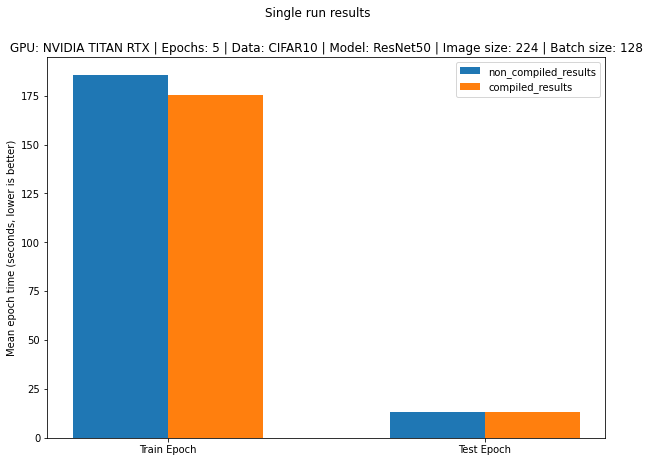

In [ ]:
# Create directory for saving figures
import os
dir_to_save_figures_in = "pytorch_2_results/figures/"
os.makedirs(dir_to_save_figures_in, exist_ok=True)

# Create a save path for the single run results
save_path_multi_run = f"{dir_to_save_figures_in}single_run_{GPU_NAME}_{MODEL_NAME}_{DATASET_NAME}_{IMAGE_SIZE}_train_epoch_time.png"
print(f"[INFO] Save path for single run results: {save_path_multi_run}")

# Plot the results and save the figures
plot_mean_epoch_times(non_compiled_results=single_run_no_compile_results_df,
                      compiled_results=single_run_compile_results_df,
                      multi_runs=False,
                      save_path=save_path_multi_run,
                      save=True)

Hmm... what's happening here?

It looks like the model with `torch.compile()` took *longer* than the model without it (on an A100, this is the case, but on my local NVIDIA TITAN RTX, the compiled model is slightly faster).

Why might this be the case?

Well on a per epoch time we can see that although experiment 2 (with `torch.compile()`) was far slower for the first epoch, it started being faster than experiment 1 (without `torch.compile()`) for subsequent epochs.

This is because behind the scenes `torch.compile()` spends the first steps of a training run "warming up" the model and performing optimization steps behind the scenes.

These **optimization steps take time up front** but mean **subsequent steps should be faster**.

To test if this is true, you could try training the model above for longer (say 50 epochs rather than 5) and see what the average training times come out to be.

### 3.4 Save single run results to file with GPU details

We can save the raw data of our results to file too by exporting the dataframes as CSVs.

We'll first create a directory for storing results.

Then we'll create filepaths to save each of the target dataframes to before exporting them.

In [ ]:
# Make a directory for single_run results
import os
pytorch_2_results_dir = "pytorch_2_results"
pytorch_2_single_run_results_dir = f"{pytorch_2_results_dir}/single_run_results"
os.makedirs(pytorch_2_single_run_results_dir, exist_ok=True)

# Create filenames for each of the dataframes
save_name_for_non_compiled_results = f"single_run_non_compiled_results_{DATASET_NAME}_{MODEL_NAME}_{GPU_NAME}.csv"
save_name_for_compiled_results = f"single_run_compiled_results_{DATASET_NAME}_{MODEL_NAME}_{GPU_NAME}.csv"

# Create filepaths to save the results to
single_run_no_compile_save_path = f"{pytorch_2_single_run_results_dir}/{save_name_for_non_compiled_results}"
single_run_compile_save_path = f"{pytorch_2_single_run_results_dir}/{save_name_for_compiled_results}"
print(f"[INFO] Saving non-compiled experiment 1 results to: {single_run_no_compile_save_path}")
print(f"[INFO] Saving compiled experiment 2 results to: {single_run_compile_save_path}")

# Save the results
single_run_no_compile_results_df.to_csv(single_run_no_compile_save_path)
single_run_compile_results_df.to_csv(single_run_compile_save_path)

[INFO] Saving non-compiled experiment 1 results to: pytorch_2_results/single_run_results/single_run_non_compiled_results_CIFAR10_ResNet50_NVIDIA_TITAN_RTX.csv
[INFO] Saving compiled experiment 2 results to: pytorch_2_results/single_run_results/single_run_compiled_results_CIFAR10_ResNet50_NVIDIA_TITAN_RTX.csv


## 4. Time models across multiple runs

Now we've tested our model with a single run with `torch.compile()` on and off, let's do the same for multiple runs.

We're going to start by creating three functions for experiments 3 and 4.

1. **Experiment 3:** `create_and_train_non_compiled_model()` - this function will be similar to the workflow we've used for the single runs. We'll put the model creation (via `create_model()`) and training in a single function so we can call it multiple times (for multiple runs) and measure the time of each run.
2. **Experiment 4:** `create_compiled_model()` - this function will be similar to the `create_model()` function above, however, it will create a normal PyTorch model and then call `torch.compile()` on it and return it.
3. **Experiment 4:** `train_compiled_model()` - this function will take in a compiled model and train it in the same way we've been training our models for single runs.

Why separate functions 2 and 3 (`create_compiled_model()` and `train_compiled_model()`) for experiment 4?

Because calling `torch.compile()` on model means that for the first few runs, the model will be "warming up" as PyTorch calculates a bunch of optimization steps behind the scenes.

So in practice, you'll generally want to compile up front *once* and then train/perform inference with an already compiled model.

In [ ]:
def create_and_train_non_compiled_model(epochs=NUM_EPOCHS,
                                        learning_rate=LEARNING_RATE,
                                        disable_progress_bar=False):
    """
    Create and train a non-compiled PyTorch model.
    """
    model, _ = create_model()
    model.to(device)

    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate)

    results = train(model=model,
                    train_dataloader=train_dataloader,
                    test_dataloader=test_dataloader,
                    loss_fn=loss_fn,
                    optimizer=optimizer,
                    epochs=epochs,
                    device=device,
                    disable_progress_bar=disable_progress_bar)
    return results

def create_compiled_model():
    """
    Create a compiled PyTorch model and return it.
    """
    model, _ = create_model()
    model.to(device)

    compile_start_time = time.time()
    ### New in PyTorch 2.x ###
    compiled_model = torch.compile(model)
    ##########################
    compile_end_time = time.time()

    compile_time = compile_end_time - compile_start_time

    print(f"Time to compile: {compile_time} | Note: The first time you compile your model, the first few epochs will be slower than subsequent runs.")
    return compiled_model

def train_compiled_model(model=compiled_model,
                         epochs=NUM_EPOCHS,
                         learning_rate=LEARNING_RATE,
                         disable_progress_bar=False):
    """
    Train a compiled model and return the results.
    """
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(compiled_model.parameters(),
                                 lr=learning_rate)

    compile_results = train(model=model,
                            train_dataloader=train_dataloader,
                            test_dataloader=test_dataloader,
                            loss_fn=loss_fn,
                            optimizer=optimizer,
                            epochs=epochs,
                            device=device,
                            disable_progress_bar=disable_progress_bar)

    return compile_results

### 4.1 Experiment 3 - Multiple runs, no compile

Functions ready for experiment 3 and 4!

Let's start with experiment 3.

| **Experiment** | **Model** | **Data** | **Epochs** | **Batch size** | **Image size** | **`torch.compile()`** |  
|----- |-----| -----| -----| -----| -----| -----|
| 3 (multi-run) | ResNet50 | CIFAR10 | 3x5 | 128 | 224 | No |

We'll set the number of runs to 3 and the number of epochs to 5.

We'll create an empty list to store the results and append the results of each run to it after each run.

> **Note:** Running the following code can take quite a while depending on the speed of your GPU, for me, it took 20 minutes on a NVIDIA A100 on Google Colab Pro and around 49 minutes on a NVIDIA TITAN RTX.

In [ ]:
# Run non-compiled model for multiple runs
NUM_RUNS = 3
NUM_EPOCHS = 5

# Create an empty list to store multiple run results
non_compile_results_multiple_runs = []

# Run non-compiled model for multiple runs
for i in tqdm(range(NUM_RUNS)):
    print(f"[INFO] Run {i+1} of {NUM_RUNS} for non-compiled model")
    results = create_and_train_non_compiled_model(epochs=NUM_EPOCHS, disable_progress_bar=True)
    non_compile_results_multiple_runs.append(results)

  0%|          | 0/3 [00:00<?, ?it/s]

[INFO] Run 1 of 3 for non-compiled model
Epoch: 1 | train_loss: 0.8242 | train_acc: 0.7136 | test_loss: 0.5486 | test_acc: 0.8124 | train_epoch_time: 185.1112 | test_epoch_time: 12.9925
Epoch: 2 | train_loss: 0.4415 | train_acc: 0.8479 | test_loss: 0.6415 | test_acc: 0.7829 | train_epoch_time: 185.0138 | test_epoch_time: 12.9690
Epoch: 3 | train_loss: 0.3229 | train_acc: 0.8882 | test_loss: 0.4486 | test_acc: 0.8488 | train_epoch_time: 185.0366 | test_epoch_time: 12.9433
Epoch: 4 | train_loss: 0.2433 | train_acc: 0.9151 | test_loss: 0.4376 | test_acc: 0.8596 | train_epoch_time: 185.0900 | test_epoch_time: 12.9465
Epoch: 5 | train_loss: 0.1785 | train_acc: 0.9379 | test_loss: 0.4305 | test_acc: 0.8641 | train_epoch_time: 185.0405 | test_epoch_time: 13.0102
[INFO] Run 2 of 3 for non-compiled model
Epoch: 1 | train_loss: 0.8304 | train_acc: 0.7101 | test_loss: 0.6132 | test_acc: 0.7884 | train_epoch_time: 185.0911 | test_epoch_time: 13.0429
Epoch: 2 | train_loss: 0.4602 | train_acc: 0.841

Now we've got a list of results from experiment 3, let's iterate through them and create a dataframe containing all of the results.

We'll then average the results across the 3 runs by grouping by the epoch number (the index of the dataframe) and taking the mean of the results.

In [ ]:
# Go through non_compile_results_multiple_runs and create a dataframe for each run then concatenate them together
non_compile_results_dfs = []
for result in non_compile_results_multiple_runs:
    result_df = pd.DataFrame(result)
    non_compile_results_dfs.append(result_df)
non_compile_results_multiple_runs_df = pd.concat(non_compile_results_dfs)

# Get the averages across the multiple runs
non_compile_results_multiple_runs_df = non_compile_results_multiple_runs_df.groupby(non_compile_results_multiple_runs_df.index).mean()
non_compile_results_multiple_runs_df

,train_loss,train_acc,test_loss,test_acc,train_epoch_time,test_epoch_time
0,0.815352,0.716103,0.590690,0.796710,185.060622,13.017663
1,0.447013,0.845567,0.618526,0.790150,185.004740,12.973144
2,0.322255,0.888117,0.436471,0.852321,185.068499,12.956863
3,0.242587,0.915120,0.436207,0.858946,184.995601,12.969341
4,0.179439,0.937612,0.479547,0.854727,184.995575,12.993280


Wonderful!

We can inspect these later, let's move onto experiment 4.

### 4.2 Experiment 4 - Multiple runs, with compile

Time for experiment 4.

Running a compiled model for multiple runs.

| **Experiment** | **Model** | **Data** | **Epochs** | **Batch size** | **Image size** | **`torch.compile()`** |  
|----- |-----| -----| -----| -----| -----| -----|
| 4 (multi-run) | ResNet50 | CIFAR10 | 3x5 | 128 | 224 | Yes |

We can do this by using the `create_compiled_model()` and `train_compiled_model()` functions we created earlier.

We'll start by creating the compiled model *first* and then training it for 3 runs.

We're not worried about the results of the model (loss and accuracy) as much as how long it takes.

The reason why we compile it once at the start is that PyTorch only needs to run the optimization steps once (this can take some time) and then it can reuse them for the rest of the runs.

We'll also create an empty list just like before to store our model's results over a series of runs.

> **Note:** Running the following code can take quite a while depending on the speed of your GPU, for me, it took 18 minutes on a NVIDIA A100 on Google Colab Pro and around 45 minutes on a NVIDIA TITAN RTX.

In [ ]:
# Create compiled model
compiled_model = create_compiled_model()

# Create an empty list to store compiled model results
compiled_results_multiple_runs = []

# Run compiled model for multiple runs
for i in tqdm(range(NUM_RUNS)):
    print(f"[INFO] Run {i+1} of {NUM_RUNS} for compiled model")
    # Train the compiled model (note: the model will only be compiled once and then re-used for subsequent runs)
    results = train_compiled_model(model=compiled_model, epochs=NUM_EPOCHS, disable_progress_bar=True)
    compiled_results_multiple_runs.append(results)

Time to compile: 0.001275777816772461 | Note: The first time you compile your model, the first few epochs will be slower than subsequent runs.


  0%|          | 0/3 [00:00<?, ?it/s]

[INFO] Run 1 of 3 for compiled model
Epoch: 1 | train_loss: 0.8026 | train_acc: 0.7192 | test_loss: 0.6995 | test_acc: 0.7650 | train_epoch_time: 194.3336 | test_epoch_time: 20.6106
Epoch: 2 | train_loss: 0.4440 | train_acc: 0.8483 | test_loss: 0.5565 | test_acc: 0.8089 | train_epoch_time: 169.3882 | test_epoch_time: 10.8076
Epoch: 3 | train_loss: 0.3208 | train_acc: 0.8896 | test_loss: 0.4164 | test_acc: 0.8620 | train_epoch_time: 169.9283 | test_epoch_time: 10.8361
Epoch: 4 | train_loss: 0.2329 | train_acc: 0.9197 | test_loss: 0.3635 | test_acc: 0.8792 | train_epoch_time: 169.8744 | test_epoch_time: 10.9050
Epoch: 5 | train_loss: 0.1803 | train_acc: 0.9369 | test_loss: 0.4387 | test_acc: 0.8587 | train_epoch_time: 169.6391 | test_epoch_time: 10.8240
[INFO] Run 2 of 3 for compiled model
Epoch: 1 | train_loss: 0.1875 | train_acc: 0.9347 | test_loss: 0.4187 | test_acc: 0.8714 | train_epoch_time: 169.4814 | test_epoch_time: 10.8180
Epoch: 2 | train_loss: 0.1288 | train_acc: 0.9550 | test

Experiment 4 done!

Now let's put the results together into a dataframe and take the mean across each of the runs (we'll do this by grouping by the epoch number, which is the index number of the dataframe).

In [ ]:
# Go through compile_results_multiple_runs and create a dataframe for each run then concatenate them together
compile_results_dfs = []
for result in compiled_results_multiple_runs:
    result_df = pd.DataFrame(result)
    compile_results_dfs.append(result_df)
compile_results_multiple_runs_df = pd.concat(compile_results_dfs)

# Get the averages across the multiple runs
compile_results_multiple_runs_df = compile_results_multiple_runs_df.groupby(compile_results_multiple_runs_df.index).mean() # .index = groupby the epoch number
compile_results_multiple_runs_df

,train_loss,train_acc,test_loss,test_acc,train_epoch_time,test_epoch_time
0,0.353548,0.876332,0.517181,0.840124,177.766548,14.111428
1,0.210781,0.927845,0.474630,0.856375,169.481367,10.838063
2,0.152098,0.947577,0.450293,0.872396,169.703638,10.833619
3,0.121230,0.958177,0.424376,0.884065,169.707751,10.904810
4,0.092080,0.968116,0.481520,0.870649,169.608708,10.854486


### 4.3 Compare results of experiment 3 and 4

Multi-run experiments done!

Let's inspect the results.

We can do so with our `plot_mean_epoch_times()` function we created before.

This time we'll set the `multi_runs` parameter to `True` so that our plots reflect the fact we're plotting the results of multiple runs.

We'll make sure we've got a directory to save the figure to as well.

Mean train epoch time difference: -7.443% (negative means faster)
Mean test epoch time difference: -11.351% (negative means faster)
[INFO] Plot saved to pytorch_2_results/figures/multi_run_NVIDIA_TITAN_RTX_ResNet50_CIFAR10_224_train_epoch_time.png


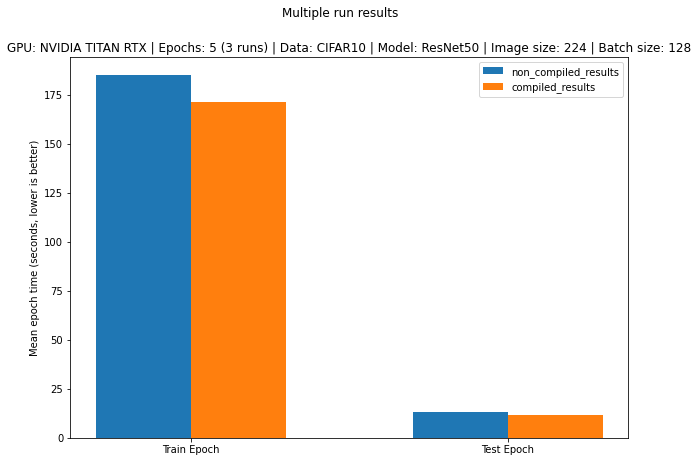

In [ ]:
# Create a directory to save the multi-run figure to
os.makedirs("pytorch_2_results/figures", exist_ok=True)

# Create a path to save the figure for multiple runs
save_path_multi_run = f"pytorch_2_results/figures/multi_run_{GPU_NAME}_{MODEL_NAME}_{DATASET_NAME}_{IMAGE_SIZE}_train_epoch_time.png"

# Plot the mean epoch times for experiment 3 and 4
plot_mean_epoch_times(non_compiled_results=non_compile_results_multiple_runs_df,
                      compiled_results=compile_results_multiple_runs_df,
                      multi_runs=True,
                      num_runs=NUM_RUNS,
                      save_path=save_path_multi_run,
                      save=True)

Nice!

Looks like the compiled model edges out the non-compiled model across multiple runs.

This is likely because on a single run (with a low amount of epochs), the compiling of the model takes quite a bit of time for the first epoch to run.

However, when the model has already been compiled and starts training for longer, the speedups from the behind the scenes optimizations start to show.

A possible extension would be to let the model train for a longer time, say 100 epochs, and see how the results compare.


### 4.4 Save multi run results to file with GPU details

Let's also save our results dataframes for experiments 3 and 4 to file to in case we'd like to inspect them later or compare them to other kinds of models.

In [ ]:
# Make a directory for multi_run results
import os
pytorch_2_results_dir = "pytorch_2_results"
pytorch_2_multi_run_results_dir = f"{pytorch_2_results_dir}/multi_run_results"
os.makedirs(pytorch_2_multi_run_results_dir, exist_ok=True)

# Create filenames for each of the dataframes
save_name_for_multi_run_non_compiled_results = f"multi_run_non_compiled_results_{NUM_RUNS}_runs_{DATASET_NAME}_{MODEL_NAME}_{GPU_NAME}.csv"
save_name_for_multi_run_compiled_results = f"multi_run_compiled_results_{NUM_RUNS}_runs_{DATASET_NAME}_{MODEL_NAME}_{GPU_NAME}.csv"

# Create filepaths to save the results to
multi_run_no_compile_save_path = f"{pytorch_2_multi_run_results_dir}/{save_name_for_non_compiled_results}"
multi_run_compile_save_path = f"{pytorch_2_multi_run_results_dir}/{save_name_for_compiled_results}"
print(f"[INFO] Saving experiment 3 non-compiled results to: {multi_run_no_compile_save_path}")
print(f"[INFO] Saving experiment 4 compiled results to: {multi_run_compile_save_path}")

# Save the results
non_compile_results_multiple_runs_df.to_csv(multi_run_no_compile_save_path)
compile_results_multiple_runs_df.to_csv(multi_run_compile_save_path)

[INFO] Saving experiment 3 non-compiled results to: pytorch_2_results/multi_run_results/single_run_non_compiled_results_CIFAR10_ResNet50_NVIDIA_TITAN_RTX.csv
[INFO] Saving experiment 4 compiled results to: pytorch_2_results/multi_run_results/single_run_compiled_results_CIFAR10_ResNet50_NVIDIA_TITAN_RTX.csv


## 5. Possible improvements and extensions

We've explored the fundamentals of `torch.compile()` and wrote code for several experiments to test how it performs.

But there's still more we could do.

As we've discussed, many of the speedups in PyTorch 2.0 and `torch.compile()` come from using newer GPUs (e.g. A100 and above) and using as much of the GPU as possible (larger batch sizes, larger model sizes).

For even more speedups, I'd recommend researching/trying the following:

* **More powerful CPUs** - I have a sneaking suspicion that Google Colab instances are limited to 2 CPU cores, speedup numbers could be improved with more CPUs. This could be tracked via the [PyTorch Profiler](https://pytorch.org/tutorials/recipes/recipes/profiler_recipe.html) (a tool to find what processes take what time).
* **Using mixed precision training** - newer GPUs have the ability to handle difference precision types (e.g. [`torch.float16`](https://pytorch.org/docs/stable/tensors.html#data-types) and [`torch.bfloat16`](https://pytorch.org/docs/stable/generated/torch.Tensor.bfloat16.html)) which enable faster training and inference. I'd suspect you'll see an even larger speedup than we've seen here by using mixed precision training. For more on this, see the [PyTorch documentation for automatic mixed precision](https://pytorch.org/docs/stable/notes/amp_examples.html#amp-examples) (also called AMP) with PyTorch.
* **Transformer based models may see more *relative* speedups than convolutional models** - PyTorch 2.0 includes a [stable release for accelerated transformer models](https://pytorch.org/blog/pytorch-2.0-release/#stable-accelerated-pytorch-2-transformers) (models which use the attention mechanism). The main speedups come from an improved implementation of [`scaled_dot_product_attention()`](https://pytorch.org/docs/master/generated/torch.nn.functional.scaled_dot_product_attention.html?highlight=scaled_dot_product#torch.nn.functional.scaled_dot_product_attention) which automatically selects the best version of attention to use based on the hardware you're computing on. You can see more in the [dedicated PyTorch tutorial](https://pytorch.org/tutorials/intermediate/scaled_dot_product_attention_tutorial.html).
* **Train for longer** - As previously discussed, the speedups from `torch.compile()` are likely to be more noticeable when training for longer. A great exercise would be to train over a longer number of epochs, potentially on a different dataset with a different model (e.g. a transformer) and see how the speedups compare.

## 6. Resources to learn more

I've found the following resources to be helpful learning about PyTorch 2.0 and it's upcoming features.

* [PyTorch 2.0 launch blog post](https://pytorch.org/get-started/pytorch-2.0/).
* [PyTorch 2.0 release notes](https://pytorch.org/blog/pytorch-2.0-release/) (blog post).
    * As well as the [GitHub release notes](https://github.com/pytorch/pytorch/releases/tag/v2.0.0) (lots of info here!).
* [PyTorch default device context manager docs](https://github.com/pytorch/tutorials/pull/2220/files).
* [PyTorch 2.0 video introduction on YouTube](https://youtu.be/WqLKfta5Ijw) (created by yours truly).
* See a [tip by Sebastian Raschka](https://twitter.com/rasbt/status/1638297626385719297?s=20) to improve `torch.compile()` by performing an example batch first (warm-up the model) before continuing with further training (this explains the increased speedups with multiple runs).